# Data Science ODL Project: Assessment 2

Dina Ranchhod

## Case study

An insurance company plans to utilise their historic insurance fraud dataset to predict the likelihood or the level of risk a customer poses. You can find the dataset here. Referring genuine claims cause customer stress and directly leads to customer loss, costing the company money (assume that any referred non-fraud case will lead to losing that customer). While obviously, fraud claims cost the company as well. Their main requirement is to use an unbiased predictive model capable of flagging and referring potential fraud cases for further investigation with a balanced error rate of 5% (you might or might not be able to achieve such performance).

# 1. Aims, objectives and plan (4 marks)

### a) Aims and objectives

In order to maximise their profits and minimise losses due to fraudulent insurance claims, an insurance company would like an unbiased predictive model to determine the level of risk a customer poses based on historic insurance fraud data. Flagging genuine claims can lead to unhappy customers due to delays in payments, and hence loss of business. Conversely, fraudulent claims cause unnecessary loss in revenue. The model should be able to detect and refer potential fraud cases for further investigation with a 5% balanced error rate. The company would also like a model to estimate the price they should charge for their insurance policies based on the error of the fraud detection model. The income from the policy price should cover the expenses of paying out claims and make an overall profit.

###  b) Plan
The Gantt Chart below shows the progression of the project. Day 1 consisted of reading the Case Study and assignment details, understanding the tasks, exploring the datasets and conducting a plan on how to proceed.

Next, preprocessing the data to clean and prepare it for feeding into the models. After preprocessing was completed, I started to build, train and optimise the models. Using metrics to evaluate performance and tune hyperparameters. After both models were trained and optimised, their accuracy was tested using the testing data and nested cross validation in order to determine the best model from the two. Finally, a conclusion was reached based on this and the codes were refined.

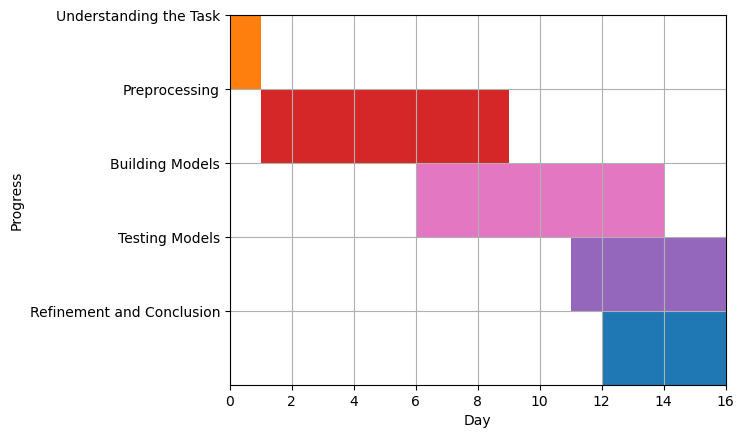

In [ ]:
import matplotlib.pyplot as plt

fig, gnt = plt.subplots()
gnt.set_ylim(0, 5)
gnt.set_xlim(0, 16)
gnt.set_xlabel('Day')
gnt.set_ylabel('Progress')
gnt.set_yticks([1, 2, 3, 4, 5])
gnt.set_yticklabels(['Refinement and Conclusion', 'Testing Models', 'Building Models', 'Preprocessing',
                     'Understanding the Task'])
gnt.grid(True)

gnt.broken_barh([(0, 1)], (4,5), facecolors =('tab:orange'))
gnt.broken_barh([(1,8)], (3,1), facecolors = ('tab:red'))
gnt.broken_barh([(6,8)], (2,1), facecolors = ('tab:pink'))
gnt.broken_barh([(11,5)], (1,1), facecolors = ('tab:purple'))
gnt.broken_barh([(12,5)], (0,1), facecolors = ('tab:blue'))

# 2. Understanding the case study (4 marks)

###  Case study analysis

An insurance company would like a model in order to help them identify fraudulent claims to prevent loss and avoid paying for fraudulent claims. They would like the predictive model to be highly reliable and accurate, with an error rate of 5%. Their aim is to ensure customer satisfaction remains high by avoiding delays when a genuine claim has been flagged as fraudulent, causing loss of business, as well as minimising the frequency of having to pay out for fraudulent claims.

1.	The first task will be to clean and prepare the raw data provided by the insurance company. Missing/ incorrect data will need to be cleared or populated.
2.	The data provided is based on policy holder information, general customer information, insured vehicle information and details of previous claims.
3.	The disjointed data will need to be merged in order to obtain a unified dataset containing all the attributes provided.
4.	Next the number of attributes will need to be reduced, retaining only the most important/relevant features to classify the claim as fraudulent or genuine.
5.	Once this has been completed the data will need to be split into training and testing sets. The training data will be used to build and train the model.
6.	Metrics based on predicting the training data will give an indication into how good the model is at correctly classifying the claims.
7.	Next hyperparameter optimisation will be required in order to obtain a model with the lowest generalisation error, with the help of cross validation
8.	The optimised model will then be fitted on the training data to give a less biased estimate for its accuracy/error
9.	The same process will be executed for the second predictive model and the same metrics for accuracy and error will be obtained.
10.	Next the two models will be compared in order to provide the best predictive classification model with the lowest generalisation error
11.	Overfitting will be handled by applying nested cross validation, this will prevent capturing the effects from particularly noisy datapoints and provide a general indication on which predictive model is better overall
12.	Finally, both optimised models will be applied to the held back testing data and metrics will be calculated to evaluate model performance.
13.	Based on these results, the best model will be selected for recommendation to the insurance company

# 3. Pre-processing applied (20 marks)

## Loading the data
First we will load in necessary library’s and packages that we will need for the analysis, then the data can be loaded in.

In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

from sklearn import model_selection
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import train_test_split

In [ ]:
## Loading in the different data files

Claim = pd.read_csv('archive/TrainData/TrainData/Train_Claim.csv')             # Information on the Claim
Policy = pd.read_csv('archive/TrainData/TrainData/Train_Policy.csv')           # Policy Information
Demo = pd.read_csv('archive/TrainData/TrainData/Train_Demographics.csv')       # Other information about policy holder
Vehicle = pd.read_csv('archive/TrainData/TrainData/Train_Vehicle.csv')         # Vehicle insured information
Target = pd.read_csv('archive/TrainData/TrainData/Traindata_with_Target.csv')  # Target data, whether the claim was fraudulent or not

## Re-formatting the data
The data has now been loaded into python. We need to have a look at the data formatting of the individual datasets.

In [ ]:
## Looking at the layout of the different data

#Claim.head()
#Policy.head()
#Demo.head()
Vehicle.head()
#Target.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212


Running the Vehicle DataFrame, we can see that this data has not been presented in the same format as the other data we have been provided. In the other DataFrames we can see that we have a single row of data for each CustomerID, the Vehicle data has multiple rows for each CustomerID. We can pivot the data so that we have 1 row for each ID and create new columns for some of the vehicle information. This will it easier for us to merge the data into a unified dataset and make it easier to explore the data and apply filters.

In [ ]:
## Data wrangling to change layout of data to make it more suitable for the classification task

Vehicle = Vehicle.pivot(index = 'CustomerID', columns = 'VehicleAttribute', values = 'VehicleAttributeDetails')
Vehicle.head()

VehicleAttribute,VehicleID,VehicleMake,VehicleModel,VehicleYOM
CustomerID,,,,
Cust10000,Vehicle26917,Audi,A5,2008
Cust10001,Vehicle15893,Audi,A5,2006
Cust10002,Vehicle5152,Volkswagen,Jetta,1999
Cust10003,Vehicle37363,Volkswagen,Jetta,2003
Cust10004,Vehicle28633,Toyota,CRV,2010


## Merging the data
All the DataFrames look uniform, we can easily merge them now.

In [ ]:
## Merging different dataset's to obtain a complete dataset:

df1 = pd.merge(Claim,Policy, on = 'CustomerID', how = 'outer')
df2 = pd.merge(Vehicle,Demo, on = 'CustomerID', how = 'outer')
df3 = pd.merge(df1,df2, on = 'CustomerID', how = 'outer')
fraudclaims = pd.merge(df3,Target, on = 'CustomerID', how = 'outer')
print(fraudclaims.shape)
fraudclaims.head()

(28836, 42)


,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India,N


Exploring the combined dataset, we can see we have 1 row for each CustomerID that contains all the infomation about them, their policy, their vehicle and claim details. In total we have 41 feature and the target column for 28,836 records.

Referring to the AttributeInfo sheet provided by the company we know we have some missing data for certain columns. The data is messy since some missing values are populated with '?''s, other with 'MISSINGDATA' and some with incorrect numbers, '-5' etc. We will need to clean the data and remove these entries to obtain blank cells in theor place.  

We will start by looking at the categorical features:

In [ ]:
## Cleaning the categorical data

fraudclaims['TypeOfCollission'].replace('?', np.nan, inplace = True)
fraudclaims['PropertyDamage'].replace('?', np.nan, inplace = True)
fraudclaims['PoliceReport'].replace('?', np.nan, inplace = True)
fraudclaims['InsuredGender'].replace('NA', np.nan, inplace = True)
fraudclaims['VehicleMake'].replace('???', np.nan, inplace = True)

Now we need to check what the missing values are populated with in the numerical columns:

In [ ]:
# fraudclaims['IncidentTime'].value_counts()         # -5
# fraudclaims['Witnesses'].value_counts()            # MISSINGVALUE
# fraudclaims['AmountOfTotalClaim'].value_counts()   # MISSEDDATA
# fraudclaims['PolicyAnnualPremium'].value_counts()  # -1

From the above we can see that IncidentTime and PolicyAnnualPremium have -5 and -1 populated for missing values. For Witnesses and AmountOfTotalClaim we will replace the strings with numerical values in order to obtain numerical columns, then replace these with NaN's.

In [ ]:
## Cleaning the numerical data

fraudclaims['IncidentTime'] = fraudclaims['IncidentTime'].astype(float)
fraudclaims['IncidentTime'].replace(-5.00, np.nan, inplace = True)
print(fraudclaims['IncidentTime'].isnull().sum())

fraudclaims['Witnesses'].replace('MISSINGVALUE', 50, inplace = True)
fraudclaims['Witnesses'] = fraudclaims['Witnesses'].astype(float)
fraudclaims['Witnesses'].replace(50.0, np.nan, inplace = True)
print(fraudclaims['Witnesses'].isnull().sum())

fraudclaims['AmountOfTotalClaim'].replace('MISSEDDATA', 1, inplace = True)
fraudclaims['AmountOfTotalClaim'] = fraudclaims['AmountOfTotalClaim'].astype(float)
fraudclaims['AmountOfTotalClaim'].replace(1.0, np.nan, inplace = True)
print(fraudclaims['AmountOfTotalClaim'].isnull().sum())

fraudclaims['PolicyAnnualPremium'].replace(-1.00, np.nan, inplace = True)
print(fraudclaims['PolicyAnnualPremium'].isnull().sum())

31
46
50
141


Above we can see how many blank entries we have in each of the numerical columns

Running the following cell will provide us with some information on our new unified dataset, including the number of columns, the data type of each column and the number of populated values in each column.

In [ ]:
fraudclaims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   DateOfIncident              28836 non-null  object 
 2   TypeOfIncident              28836 non-null  object 
 3   TypeOfCollission            23674 non-null  object 
 4   SeverityOfIncident          28836 non-null  object 
 5   AuthoritiesContacted        28836 non-null  object 
 6   IncidentState               28836 non-null  object 
 7   IncidentCity                28836 non-null  object 
 8   IncidentAddress             28836 non-null  object 
 9   IncidentTime                28805 non-null  float64
 10  NumberOfVehicles            28836 non-null  int64  
 11  PropertyDamage              18377 non-null  object 
 12  BodilyInjuries              28836 non-null  int64  
 13  Witnesses                   287

## Preparing column names
Some of the columns names are long and messy. We will have a look at all the column names and see which ones we could shorten.

In [ ]:
## Extracting column names

col_names = fraudclaims.columns
col_names

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsurancePolicyNumber',
       'CustomerLoyaltyPeriod', 'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM', 'InsuredAge',
       'InsuredZipCode', 'InsuredGender', 'InsuredEducationLevel',
       'InsuredOccupation', 'InsuredHobbies', 'CapitalGains', 'CapitalLoss',
       'Country', 'ReportedFraud'],
      dtype='object')

From the output above we have the column/attribute names from our dataset. We can see that some column labels are quite long. We can rename some of these to make them shorter.

In [ ]:
## Renaming certain columns

fraudclaims.rename(columns = {'TypeOfCollission':'TypeOfCollision'}, inplace = True)
fraudclaims.rename(columns = {'SeverityOfIncident': 'Severity'}, inplace = True)
fraudclaims.rename(columns = {'CustomerLoyaltyPeriod':'CustomerLoyalty'}, inplace = True)
fraudclaims.rename(columns = {'InsuredAge':'Age'}, inplace = True)
fraudclaims.rename(columns = {'InsuredGender':'Gender'}, inplace = True)
fraudclaims.rename(columns = {'InsuredEducationLevel':'EducationLevel'}, inplace = True)
fraudclaims.rename(columns = {'InsuredOccupation':'Occupation'}, inplace = True)
fraudclaims.rename(columns = {'ReportedFraud':'Fraud'}, inplace = True)

The target column is populated with 'N' for non-fraudulent instances and 'Y' for fraudulent cases. This is interpreted as categorical by python. Instead of having classes N and Y, we can convert them into numeric classes 0 and 1. This will help us later on when we come to fit a model to the data since most models in Python cannot process categorical data. Here we will assign 0 to non-fraudulent cases and 1 to fraudulent ones. The numerical encoding of the labels is important since when we plot the ROC curve later when comparing models we need the fraudulent records to be the positive class.

In [ ]:
## Converting target column from categorical to numerical classes

fraudclaims['Fraud'].value_counts()

labels = fraudclaims['Fraud'].astype('category').cat.categories.tolist()
replace_labels = {'Fraud' : {k: v for k,v in zip(labels,list(range(len(labels)+1)))}}
print(replace_labels)

fraudclaims.replace(replace_labels, inplace=True)
fraudclaims.head()

{'Fraud': {'N': 0, 'Y': 1}}


,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollision,Severity,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Age,InsuredZipCode,Gender,EducationLevel,Occupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,Fraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,...,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,0
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,...,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,0
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,...,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,0
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,...,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,0
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,...,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India,0


## Checking the distribution of our data
The bar chart below shows the distribution of the 2 classes in the whole dataset. When we come to splitting the dataset into training and testing sets, we will want to preserve the distributions of the classes.

<BarContainer object of 2 artists>

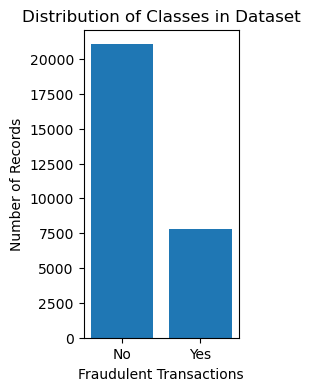

In [ ]:
## Plotting the classes to see the distribution

plt.figure(figsize=(2, 4))
counts = fraudclaims['Fraud'].value_counts()
plt.title('Distribution of Classes in Dataset')
plt.xlabel('Fraudulent Transactions')
plt.ylabel('Number of Records')
plt.bar(['No', 'Yes'], [counts[0], counts[1]])

In [ ]:
fraudclaims['Fraud'].value_counts()/fraudclaims.shape[0]

0    0.730025
1    0.269975
Name: Fraud, dtype: float64

From the bar chart above we can see that we have far more instances classed as 'not fraud' in comparison to 'fraud'. From the statistics we can see that approximately 73% of the data is in class 0 (not fraud) and 27% is in class 1 (fraud). We can compare these values to the training and testing sets to check we have preserved the footprint of the original data.

We are aiming to build a model that detects fraudulent instances, but our model has far more non-fraudulent data points, it is imbalanced. Hence, we will need to adjust the weights of the models we use to put more emphasis on the fraudulent data points in order to have a well-trained model. We will also need to consider model performance metrics that are robust to imbalanced classes.

## Feature selection

### Dealing with missing values

So far, we are left with a dataset with 28,836 data points and 41 attributes. Feeding 41 attributes into any model will be computationally expensive and inefficient, hence we need to remove any attributes that are not relevant/do not affect the classification.

Datasets are split into training and testing sets to reserve some unseen data in order to measure model performance. The majority of data is used in building and training the model, and the testing set is when we apply our model to 'unseen' data, obtain classification predictions and compare these to the actual classes. We will split our data in a 70/30 format (i.e., 70% of the data is used in training, 30% of the data is used for testing).

Before we can apply a feature selection function to test the data we need to deal with missing values. For this we need to split our data into training and testing sets in order to avoid data leakage. Data leakage occurs when the predictive model is created using data from outside the training set. The information from a testing set or (new data points) should be treated as unknown/unseen data and should not be used in order to build the model. When data leakage occurs performance of the model is invalidated since the model was constructed with data it would not know.

Hence when populating missing cells with the average, for example, we don't include the testing dataset when computing the average, this would be data leakage. We will apply the average from the training set to the missing values in the testing set.

The code below shows how we will split our dataset into training and testing. We want to use stratified sampling in order to preserve the distribution of the original dataset. As we saw earlier, we have a 73% / 27% split in the classes. We will check this is preserved after splitting the data.

In [ ]:
X = fraudclaims.loc[:, fraudclaims.columns !='Fraud']
y = fraudclaims['Fraud']

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

Before we go any further, we should check the distributions of the training and testing sets to see if the footprints of the original dataset have been preserved.

<BarContainer object of 2 artists>

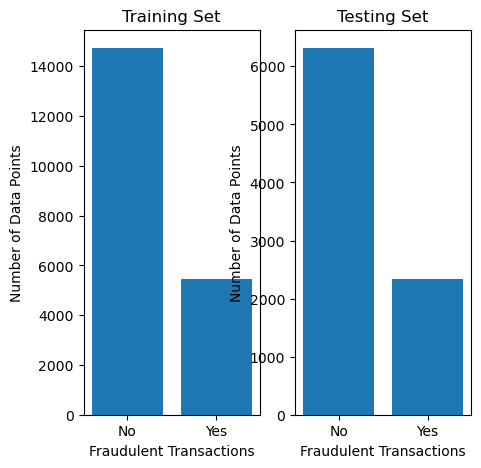

In [ ]:
## Plotting the classes in the training and testing sets to check the distributions

plt.figure(figsize=(5, 5))
plt.subplot(1,2,1)
plt.title('Training Set')
plt.xlabel('Fraudulent Transactions')
plt.ylabel('Number of Data Points')
not_fraud_tr = y1_train[y1_train == 0].shape[0]
fraud_tr = y1_train[y1_train == 1].shape[0]
plt.bar(['No', 'Yes'], [not_fraud_tr, fraud_tr])


plt.subplot(1,2,2)
plt.title('Testing Set')
plt.xlabel('Fraudulent Transactions')
plt.ylabel('Number of Data Points')
not_fraud_te = y1_test[y1_test == 0].shape[0]
fraud_te = y1_test[y1_test == 1].shape[0]
plt.bar(['No', 'Yes'], [not_fraud_te, fraud_te])

In [ ]:
## Training Set Distribution
tr_dist = (y1_train.value_counts())/y1_train.shape[0]
print(tr_dist)

## Testing Set Distribution
te_dist = (y1_test.value_counts())/y1_test.shape[0]
print(te_dist)

0    0.730047
1    0.269953
Name: Fraud, dtype: float64
0    0.729973
1    0.270027
Name: Fraud, dtype: float64


The plots and statistics above show that the distributions in the original dataset have been reflected in the training and testing sets.

Now we can start to reduce the number of features we have. We can remove identification columns such as CustomerID, InsurancePolicyNumber and VehicleID. These attributes are unique to each customer and hence will not be needed in the classification task.

Further to this there are 2 columns containing dates, DateOfIncindent and DateOfPolicyCoverage. These 2 columns can also be removed since these dates can vary vastly, including them may overfit the model since it will try to account for the variation within these features.

We can also remove the Country feature since all entries are the same except for 2 missing values, t has very low variance so is unlikely to be an important feature for classification.

In [ ]:
to_remove = ['CustomerID', 'InsurancePolicyNumber', 'VehicleID', 'DateOfIncident',
            'DateOfPolicyCoverage', 'Country']
X1_train.drop(to_remove, axis = 1, inplace = True)
X1_test.drop(to_remove, axis = 1, inplace = True)

X1_train.head()

,TypeOfIncident,TypeOfCollision,Severity,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,...,VehicleModel,VehicleYOM,Age,InsuredZipCode,Gender,EducationLevel,Occupation,InsuredHobbies,CapitalGains,CapitalLoss
14587,Multi-vehicle Collision,Front Collision,Major Damage,Fire,State4,City1,Location 1608,22.0,3,NO,...,Pathfinder,2010,29,450341,FEMALE,JD,handlers-cleaners,video-games,52100,-54800
7332,Multi-vehicle Collision,Side Collision,Total Loss,Police,State9,City3,Location 1780,20.0,3,NaN,...,Highlander,2011,41,475292,FEMALE,JD,priv-house-serv,exercise,53100,-36200
5058,Multi-vehicle Collision,Side Collision,Total Loss,Other,State7,City7,Location 1568,6.0,4,NaN,...,CRV,2008,42,444913,FEMALE,MD,machine-op-inspct,exercise,39900,-60200
25325,Single Vehicle Collision,Rear Collision,Major Damage,Fire,State8,City3,Location 1527,3.0,1,NaN,...,92x,1997,45,604450,FEMALE,High School,machine-op-inspct,basketball,0,-74200
11685,Multi-vehicle Collision,Side Collision,Major Damage,Fire,State7,City2,Location 1459,20.0,3,NaN,...,Wrangler,1999,39,458237,MALE,High School,machine-op-inspct,hiking,87800,-51200


We have decreased the number of attributes to 36. Now let's deal with missing values in the remaining features we have.

In [ ]:
X1_train.isnull().sum()
# X1_test.isnull().sum()

TypeOfIncident                   0
TypeOfCollision               3571
Severity                         0
AuthoritiesContacted             0
IncidentState                    0
IncidentCity                     0
IncidentAddress                  0
IncidentTime                    20
NumberOfVehicles                 0
PropertyDamage                7329
BodilyInjuries                   0
Witnesses                       32
PoliceReport                  6864
AmountOfTotalClaim              35
AmountOfInjuryClaim              0
AmountOfPropertyClaim            0
AmountOfVehicleDamage            0
CustomerLoyalty                  0
InsurancePolicyState             0
Policy_CombinedSingleLimit       0
Policy_Deductible                0
PolicyAnnualPremium            107
UmbrellaLimit                    0
InsuredRelationship              0
VehicleMake                     35
VehicleModel                     0
VehicleYOM                       0
Age                              0
InsuredZipCode      

In [ ]:
missing = ['TypeOfCollision', 'IncidentTime', 'PropertyDamage', 'Witnesses', 'PoliceReport',
               'AmountOfTotalClaim', 'PolicyAnnualPremium', 'VehicleMake', 'Gender']
X1_train[missing]
#X1_test[missing]

,TypeOfCollision,IncidentTime,PropertyDamage,Witnesses,PoliceReport,AmountOfTotalClaim,PolicyAnnualPremium,VehicleMake,Gender
14587,Front Collision,22.0,NO,0.0,NaN,73358.0,710.04,Nissan,FEMALE
7332,Side Collision,20.0,NaN,2.0,YES,70527.0,1101.58,Toyota,FEMALE
5058,Side Collision,6.0,NaN,1.0,YES,65689.0,1094.22,Toyota,FEMALE
25325,Rear Collision,3.0,NaN,1.0,YES,79104.0,1214.96,Saab,FEMALE
11685,Side Collision,20.0,NaN,0.0,NO,85678.0,1261.19,Jeep,MALE
...,...,...,...,...,...,...,...,...,...
6788,Rear Collision,18.0,NO,2.0,YES,47668.0,1432.42,Suburu,FEMALE
27962,Side Collision,10.0,NO,3.0,NO,57952.0,1349.37,BMW,MALE
11822,Front Collision,16.0,NO,3.0,NO,72576.0,851.46,Dodge,MALE
10211,Rear Collision,15.0,NaN,3.0,NO,66098.0,1353.55,Suburu,FEMALE


Above we can see that we have 5 categorical and 4 numerical attributes with missing values. For the numeric columns we can calculate the average of the column from the training set and populate missing values in the training and testing sets. For the categorical attributes, we could either:
- remove these rows, or
- consider the missing data as data in itself

Removing rows leads to loss of data. instead, we could take the fact that a certain attribute's value was chosen to be omitted by the customer and use this in our model, creating a new value the attribute can take. For the categorical attributes, missing values will be populated with 'not provided'.

Let's start with the categorical columns:

In [ ]:
## Replacing misisng categorical values in the training set

X1_train['TypeOfCollision'].fillna('not provided', inplace = True)
X1_train['PropertyDamage'].fillna('not provided', inplace = True)
X1_train['PoliceReport'].fillna('not provided', inplace = True)
X1_train['VehicleMake'].fillna('not provided', inplace = True)
X1_train['Gender'].fillna('not provided', inplace = True)

## Now repeating the process for the testing set

X1_test['TypeOfCollision'].fillna('not provided', inplace = True)
X1_test['PropertyDamage'].fillna('not provided', inplace = True)
X1_test['PoliceReport'].fillna('not provided', inplace = True)
X1_test['VehicleMake'].fillna('not provided', inplace = True)
X1_test['Gender'].fillna('not provided', inplace = True)

For the numerical attributes, missing values can be populated with the average computed from the training data. This can be applied to both the training as testing data, we apply the training average to the testing data because we are assuming the testing data is new data that is unavailable to us, we have to use the data we have. This will also avoid data leakage between the training and testing sets.

In [ ]:
## Populating numerical attributes with the column average fom the training set

# IncidentTime
mean_time = round(X1_train['IncidentTime'].mean(),0)
X1_train['IncidentTime'].fillna(mean_time, inplace = True)
X1_test['IncidentTime'].fillna(mean_time, inplace = True)

# Witnesses
mean_wit = round(X1_train['Witnesses'].mean(),0)
X1_train['Witnesses'].fillna(mean_wit, inplace = True)
X1_test['Witnesses'].fillna(mean_wit, inplace = True)

# AmountOfTotalClaim
mean_claim = round(X1_train['AmountOfTotalClaim'].mean(),0)
X1_train['AmountOfTotalClaim'].fillna(mean_claim, inplace = True)
X1_test['AmountOfTotalClaim'].fillna(mean_claim, inplace = True)

# PolicyAnnualPremium
mean_prem = round(X1_train['PolicyAnnualPremium'].mean(),2)
X1_train['PolicyAnnualPremium'].fillna(mean_prem, inplace = True)
X1_test['PolicyAnnualPremium'].fillna(mean_prem, inplace = True)

In [ ]:
## Checking we have no missing values in our training and testing sets

X1_train.isnull().sum()
# X1_test.isnull().sum()

TypeOfIncident                0
TypeOfCollision               0
Severity                      0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
PoliceReport                  0
AmountOfTotalClaim            0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
CustomerLoyalty               0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
Policy_Deductible             0
PolicyAnnualPremium           0
UmbrellaLimit                 0
InsuredRelationship           0
VehicleMake                   0
VehicleModel                  0
VehicleYOM                    0
Age                           0
InsuredZipCode                0
Gender                        0
EducationLevel                0
Occupati

### Encoding categorical columns
Now the data itself has been pre-processed we can apply feature selection to reduce the number of attributes we have, retaining those that have the most influence on the classification.

In [ ]:
X1_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8651 entries, 14295 to 9958
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TypeOfIncident              8651 non-null   object 
 1   TypeOfCollision             8651 non-null   object 
 2   Severity                    8651 non-null   object 
 3   AuthoritiesContacted        8651 non-null   object 
 4   IncidentState               8651 non-null   object 
 5   IncidentCity                8651 non-null   object 
 6   IncidentAddress             8651 non-null   object 
 7   IncidentTime                8651 non-null   float64
 8   NumberOfVehicles            8651 non-null   int64  
 9   PropertyDamage              8651 non-null   object 
 10  BodilyInjuries              8651 non-null   int64  
 11  Witnesses                   8651 non-null   float64
 12  PoliceReport                8651 non-null   object 
 13  AmountOfTotalClaim          8

From the above we can see that we have 19 categorical attributes. These need to be encoded into numerical columns in order for us to feed the data into predictive models.

In [ ]:
## Helper function to identify categorical attributes
def categorical(df):
    ColumnsToEncode = list(df.select_dtypes(include=['category','object']))
    return ColumnsToEncode

cat_cols = categorical(X1_train)
le = LabelEncoder()

for col in cat_cols:
    train_le = le.fit(X1_train[col])
    X1_train[col] = train_le.transform(X1_train[col])
    X1_test[col] = train_le.transform(X1_test[col])

    print(col)

TypeOfIncident
TypeOfCollision
Severity
AuthoritiesContacted
IncidentState
IncidentCity
IncidentAddress
PropertyDamage
PoliceReport
InsurancePolicyState
Policy_CombinedSingleLimit
InsuredRelationship
VehicleMake
VehicleModel
VehicleYOM
Gender
EducationLevel
Occupation
InsuredHobbies


Executing the code below, we can see that we have successfully encoded our categorical columns into numerical columns. Let's have a look at the data:

In [ ]:
X1_train.head()
# X1_test.head()

,TypeOfIncident,TypeOfCollision,Severity,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,...,VehicleModel,VehicleYOM,Age,InsuredZipCode,Gender,EducationLevel,Occupation,InsuredHobbies,CapitalGains,CapitalLoss
14587,0,0,0,1,1,0,542,22.0,3,0,...,29,15,29,450341,0,3,5,18,52100,-54800
7332,0,2,2,4,6,2,705,20.0,3,2,...,18,16,41,475292,0,3,8,8,53100,-36200
5058,0,2,2,3,4,6,510,6.0,4,2,...,8,13,42,444913,0,4,6,8,39900,-60200
25325,2,1,0,1,5,2,473,3.0,1,2,...,1,2,45,604450,0,2,6,1,0,-74200
11685,0,2,0,1,4,1,412,20.0,3,2,...,36,4,39,458237,1,2,6,10,87800,-51200


### Rescaling the data
From the above we can see that we have large differences in terms of scale of the columns. This can lead to feature dominance, where features with larger values may skew the model in their favour. We need the columns to be within the same range, e.g., between 0 and 1, so that all features are valued equally. We can fix this by rescaling our dataset. In order to avoid data leakage, we will fit the scaling to the training data and apply to both the training and testing datasets.

In [ ]:
## Rescaling the data

scaler = MinMaxScaler()
train_scale = scaler.fit(X1_train[X1_train.columns])
X1_train[X1_train.columns] = train_scale.transform(X1_train[X1_train.columns])
X1_test[X1_test.columns] = train_scale.transform(X1_test[X1_test.columns])

In [ ]:
X1_train.head()
# X1_test.head()

,TypeOfIncident,TypeOfCollision,Severity,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,...,VehicleModel,VehicleYOM,Age,InsuredZipCode,Gender,EducationLevel,Occupation,InsuredHobbies,CapitalGains,CapitalLoss
14587,0.000000,0.000000,0.000000,0.25,0.166667,0.000000,0.542543,0.956522,0.666667,0.0,...,0.763158,0.75,0.204545,0.106032,0.0,0.500000,0.384615,0.947368,0.518408,0.506751
7332,0.000000,0.666667,0.666667,1.00,1.000000,0.333333,0.705706,0.869565,0.666667,1.0,...,0.473684,0.80,0.477273,0.236762,0.0,0.500000,0.615385,0.421053,0.528358,0.674167
5058,0.000000,0.666667,0.666667,0.75,0.666667,1.000000,0.510511,0.260870,1.000000,1.0,...,0.210526,0.65,0.500000,0.077592,0.0,0.666667,0.461538,0.421053,0.397015,0.458146
25325,0.666667,0.333333,0.000000,0.25,0.833333,0.333333,0.473473,0.130435,0.000000,1.0,...,0.026316,0.10,0.568182,0.913485,0.0,0.333333,0.461538,0.052632,0.000000,0.332133
11685,0.000000,0.666667,0.000000,0.25,0.666667,0.166667,0.412412,0.869565,0.666667,1.0,...,0.947368,0.20,0.431818,0.147403,0.5,0.333333,0.461538,0.526316,0.873632,0.539154


### Feature Selection
Now we can employ a feature selection technique that will show the influence the values of certain features have on the class. From the plot below we can see that Severity is by far the most important feature in our dataset, followed by InsuredHobbies. Features following this have much smaller importance and more so when we reach over 10 attributes.

[0.00725598 0.01335013 0.14927226 0.01289294 0.02135074 0.01799602
 0.03859724 0.03018017 0.01097516 0.00969804 0.0114355  0.01479973
 0.009104   0.04037693 0.04190725 0.04012163 0.04332248 0.03712223
 0.00975792 0.01722212 0.0283596  0.03990167 0.02182272 0.01684665
 0.02343488 0.03020875 0.02774597 0.02941426 0.04054642 0.00590531
 0.01842492 0.02740778 0.07217758 0.02046767 0.02059733]


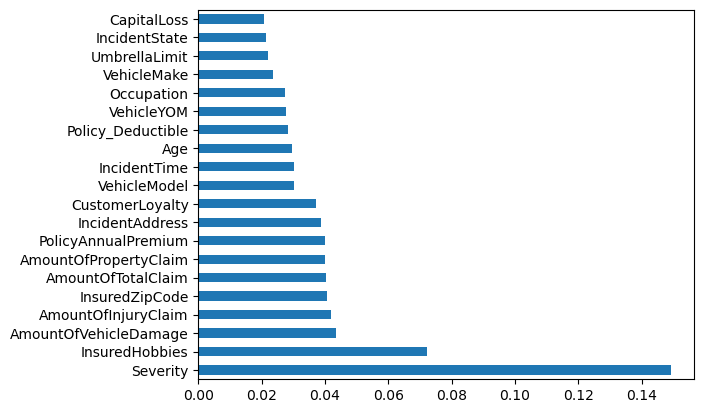

In [ ]:
model = RandomForestClassifier()
model.fit(X1_train,y1_train)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X1_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

We can view the correlations between attributes below and can remove some features that are correlated to each other since we don't need both in our data. Keeping highly correlated attributes in the dataset is unnecessary and may affect the performance. Any features that have a correlation larger than 0.5 and smaller than -0.5 will be considered for removal.

In [ ]:
## Attribute correlations

feat_corr = X1_train.corr()
feat_corr

,TypeOfIncident,TypeOfCollision,Severity,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,...,VehicleModel,VehicleYOM,Age,InsuredZipCode,Gender,EducationLevel,Occupation,InsuredHobbies,CapitalGains,CapitalLoss
TypeOfIncident,1.000000,0.214052,0.156774,0.092716,0.057646,0.027615,0.043280,-0.175336,-0.815505,-0.007719,...,-0.024280,-0.071323,-0.011145,0.003936,0.006440,0.016508,-0.011439,0.013254,-0.046920,0.008625
TypeOfCollision,0.214052,1.000000,0.278103,0.215516,0.068146,0.006029,0.079276,-0.180509,-0.227203,-0.012623,...,-0.021595,0.016944,-0.078132,0.017689,-0.001185,-0.066162,-0.002685,0.043133,-0.023526,0.026705
Severity,0.156774,0.278103,1.000000,0.127540,0.057412,-0.019755,0.026782,-0.073381,-0.179646,-0.016486,...,-0.032005,-0.001814,-0.045913,0.005478,-0.020673,-0.010450,0.007285,-0.018533,-0.021606,-0.008377
AuthoritiesContacted,0.092716,0.215516,0.127540,1.000000,0.026916,0.004373,0.068807,-0.053207,-0.089929,0.020409,...,0.004805,0.055109,0.033333,-0.003105,0.036421,-0.017059,0.001347,-0.020779,-0.030901,0.017219
IncidentState,0.057646,0.068146,0.057412,0.026916,1.000000,0.004563,0.035102,-0.029982,-0.065891,-0.026257,...,-0.038693,-0.012234,0.027038,-0.023184,-0.014542,0.001514,-0.023253,0.046279,0.011537,-0.041265
IncidentCity,0.027615,0.006029,-0.019755,0.004373,0.004563,1.000000,0.003940,0.019498,-0.029936,-0.021605,...,0.003623,0.054179,-0.008512,-0.012198,0.016434,-0.000618,0.007270,0.020183,-0.011405,-0.049542
IncidentAddress,0.043280,0.079276,0.026782,0.068807,0.035102,0.003940,1.000000,-0.025166,-0.039804,-0.015030,...,0.011778,0.017531,0.007919,0.043942,-0.007625,0.009546,-0.015127,-0.037196,-0.021844,-0.037965
IncidentTime,-0.175336,-0.180509,-0.073381,-0.053207,-0.029982,0.019498,-0.025166,1.000000,0.174606,-0.030497,...,-0.025086,0.040744,0.108197,0.004158,0.019054,-0.031584,-0.004034,0.003486,-0.009838,-0.014314
NumberOfVehicles,-0.815505,-0.227203,-0.179646,-0.089929,-0.065891,-0.029936,-0.039804,0.174606,1.000000,-0.000110,...,0.026571,0.045403,0.022748,0.007304,0.010230,-0.007788,-0.000753,0.009023,0.058476,-0.005519
PropertyDamage,-0.007719,-0.012623,-0.016486,0.020409,-0.026257,-0.021605,-0.015030,-0.030497,-0.000110,1.000000,...,0.017007,0.031269,-0.002093,-0.038399,-0.026541,-0.016473,-0.041860,0.003806,-0.025527,-0.007258


From the correlation matrix above we can see we have a few correlated attributes:
- TypeOfIncident and NumberOfVehicles
- TypeOfCollision and AmountOfTotalClaim
- TypeOfCollision and AmountOfInjuryClaim
- TypeOfCollision and AmountOfPropertyClaim
- TypeOfCollision and AmountOfVehicleDamage
- AmountOfTotalClaim and AmountOfInjuryClaim
- AmountOfTotalClaim and AmountOfPropertyClaim
- AmountOfTotalClaim and AmountOfVehicleDamage
- AmountOfInjuryClaim and AmountOfPropertyClaim
- AmountOfInjuryClaim and AmountOfVehicleDamage
- AmountOfPropertyClaim and AmountOfVehicleDamage
- CustomerLoyalty and Age

We can see that the claim amount columns are all correlated with each other, from the feature importance plot it is suggested that they are all equally influential on the classification. AmountOfVehicleDamage has the largest influence, so we will retain this attribute and remove the rest. Further to this we can remove TypeOfCollision, TypeOfIncident and Age attributes from the data since they have relatively small feature importance.

Whatever we remove from the training set, we also have to remove from the testing set.

In [ ]:
## Removing correlated features

remove = ['AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfTotalClaim', 'TypeOfCollision',
          'TypeOfIncident', 'Age']
X1_train.drop(remove, axis = 1, inplace = True)
X1_test.drop(remove, axis = 1, inplace = True)

In [ ]:
## Attribute correlations

co_2 = X1_train.corr()
co_2

,Severity,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,...,VehicleMake,VehicleModel,VehicleYOM,InsuredZipCode,Gender,EducationLevel,Occupation,InsuredHobbies,CapitalGains,CapitalLoss
Severity,1.000000,0.127540,0.057412,-0.019755,0.026782,-0.073381,-0.179646,-0.016486,-0.011844,-0.013401,...,-0.013109,-0.032005,-0.001814,0.005478,-0.020673,-0.010450,0.007285,-0.018533,-0.021606,-0.008377
AuthoritiesContacted,0.127540,1.000000,0.026916,0.004373,0.068807,-0.053207,-0.089929,0.020409,0.042183,0.005332,...,-0.017755,0.004805,0.055109,-0.003105,0.036421,-0.017059,0.001347,-0.020779,-0.030901,0.017219
IncidentState,0.057412,0.026916,1.000000,0.004563,0.035102,-0.029982,-0.065891,-0.026257,0.014981,0.015643,...,0.047036,-0.038693,-0.012234,-0.023184,-0.014542,0.001514,-0.023253,0.046279,0.011537,-0.041265
IncidentCity,-0.019755,0.004373,0.004563,1.000000,0.003940,0.019498,-0.029936,-0.021605,0.045871,0.018505,...,0.005620,0.003623,0.054179,-0.012198,0.016434,-0.000618,0.007270,0.020183,-0.011405,-0.049542
IncidentAddress,0.026782,0.068807,0.035102,0.003940,1.000000,-0.025166,-0.039804,-0.015030,-0.009049,0.000474,...,0.012351,0.011778,0.017531,0.043942,-0.007625,0.009546,-0.015127,-0.037196,-0.021844,-0.037965
IncidentTime,-0.073381,-0.053207,-0.029982,0.019498,-0.025166,1.000000,0.174606,-0.030497,-0.045665,0.005191,...,-0.011193,-0.025086,0.040744,0.004158,0.019054,-0.031584,-0.004034,0.003486,-0.009838,-0.014314
NumberOfVehicles,-0.179646,-0.089929,-0.065891,-0.029936,-0.039804,0.174606,1.000000,-0.000110,0.015868,-0.022547,...,0.023620,0.026571,0.045403,0.007304,0.010230,-0.007788,-0.000753,0.009023,0.058476,-0.005519
PropertyDamage,-0.016486,0.020409,-0.026257,-0.021605,-0.015030,-0.030497,-0.000110,1.000000,0.013639,0.038944,...,0.014796,0.017007,0.031269,-0.038399,-0.026541,-0.016473,-0.041860,0.003806,-0.025527,-0.007258
BodilyInjuries,-0.011844,0.042183,0.014981,0.045871,-0.009049,-0.045665,0.015868,0.013639,1.000000,-0.030490,...,0.031069,0.035615,-0.018783,0.010939,0.001932,-0.012205,0.000506,0.043008,0.057639,-0.032390
Witnesses,-0.013401,0.005332,0.015643,0.018505,0.000474,0.005191,-0.022547,0.038944,-0.030490,1.000000,...,0.024297,-0.010871,0.068351,0.005453,0.030945,0.007797,-0.005081,-0.023113,-0.020296,-0.042406


In [ ]:
X1_train.head()

,Severity,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,...,VehicleMake,VehicleModel,VehicleYOM,InsuredZipCode,Gender,EducationLevel,Occupation,InsuredHobbies,CapitalGains,CapitalLoss
14587,0.000000,0.25,0.166667,0.000000,0.542543,0.956522,0.666667,0.0,0.0,0.000000,...,0.642857,0.763158,0.75,0.106032,0.0,0.500000,0.384615,0.947368,0.518408,0.506751
7332,0.666667,1.00,1.000000,0.333333,0.705706,0.869565,0.666667,1.0,1.0,0.666667,...,0.857143,0.473684,0.80,0.236762,0.0,0.500000,0.615385,0.421053,0.528358,0.674167
5058,0.666667,0.75,0.666667,1.000000,0.510511,0.260870,1.000000,1.0,1.0,0.333333,...,0.857143,0.210526,0.65,0.077592,0.0,0.666667,0.461538,0.421053,0.397015,0.458146
25325,0.000000,0.25,0.833333,0.333333,0.473473,0.130435,0.000000,1.0,0.5,0.333333,...,0.714286,0.026316,0.10,0.913485,0.0,0.333333,0.461538,0.052632,0.000000,0.332133
11685,0.000000,0.25,0.666667,0.166667,0.412412,0.869565,0.666667,1.0,0.5,0.000000,...,0.500000,0.947368,0.20,0.147403,0.5,0.333333,0.461538,0.526316,0.873632,0.539154


Looking at the new correlation matrix above we can see we no longer have any correlated attributes in our dataset. We can employ feature importance again and extract 20 attributes that have the most influence on determining class.

[0.16577738 0.01605382 0.02469858 0.02193673 0.04711499 0.03578086
 0.0141109  0.01161017 0.01355105 0.0167029  0.01130945 0.06249852
 0.04834702 0.01188194 0.02103997 0.03404164 0.04814314 0.02251006
 0.02002119 0.02795567 0.03634002 0.03379737 0.05068278 0.00697288
 0.02150203 0.03101397 0.0947988  0.02454954 0.02525665]


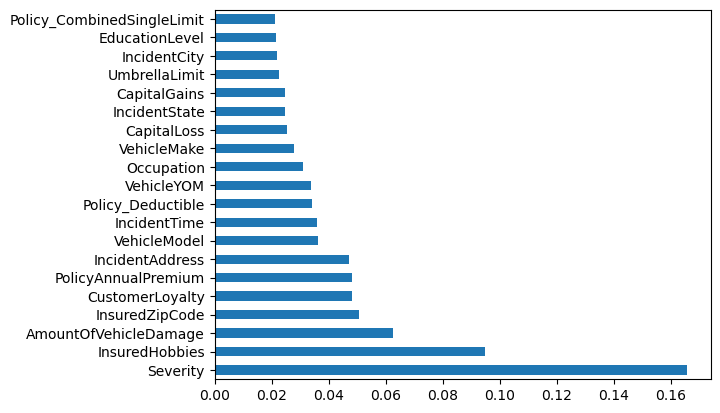

In [ ]:
model = RandomForestClassifier()
model.fit(X1_train,y1_train)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X1_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

From the above we can see that feature importance drops almost exponentially after Severity. We may not need all 25 attributes shown above. We can test the error within the model as we remove the least important attributes until we are left with only Severity.

In [ ]:
## Top 20 features
sub_1 = ['Severity', 'InsuredHobbies', 'AmountOfVehicleDamage', 'InsuredZipCode', 'CustomerLoyalty',
         'PolicyAnnualPremium', 'IncidentAddress','VehicleModel', 'IncidentTime', 'VehicleYOM',
         'Policy_Deductible','Occupation', 'VehicleMake', 'CapitalLoss', 'IncidentState','CapitalGains',
         'UmbrellaLimit', 'IncidentCity','EducationLevel', 'Policy_CombinedSingleLimit']

In [ ]:
def F1(model, X_test, y_test, labels):
    y_pred = model.predict(X_test)
    score = f1_score(y_test,y_pred,labels = labels)

    return score

RF = RandomForestClassifier(random_state=1)
error = []
accuracy = []
labels = ['not fraud', 'fraud']
for i in range(0,20):
    model = RF.fit(X1_train[sub_1[0:20-i]], y1_train)
    F1_score = F1(model, X1_train[sub_1[0:20-i]],y1_train, labels = labels)
    F1_error = 1-F1_score
    accuracy.append(F1_score)
    error.append(F1_error)

In [ ]:
# accuracy
error

[9.176837661739601e-05,
 9.176837661739601e-05,
 0.00018355359765054313,
 9.176837661739601e-05,
 9.176837661739601e-05,
 0.0,
 0.00018355359765054313,
 9.176837661739601e-05,
 0.00018355359765054313,
 0.00018355359765054313,
 9.176837661739601e-05,
 0.0002753556677375091,
 9.176837661739601e-05,
 0.00018355359765054313,
 9.176837661739601e-05,
 0.00045901037363449415,
 0.00036710719530097524,
 0.00413412953605885,
 0.3451985135928026,
 0.4062818493467988]

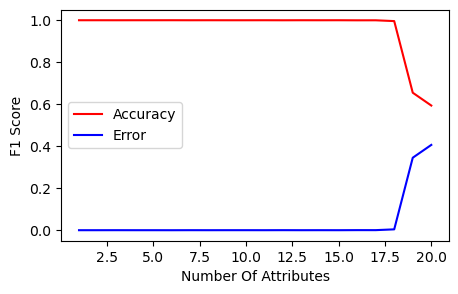

In [ ]:
## Plot of accuracy and error
plt.figure(figsize = (5,3))
ax = plt.axes()

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(x,accuracy, color='r', label = 'Accuracy')
plt.plot(x,error, color='b', label = 'Error')
plt.xlabel('Number Of Attributes')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

From the plot above we can see that there is very little generalisation error in thr model until we add the 19th and 20th features, the error increases once we add them to the model. We want to retain as many features as possible from the 20 top features, hence we will proceed with the top 18 features instead. The attributes we will remove are Education_Level and Policy_CombinedSingleLimit.

In the preprocessing step we imported and merged the disjointed datasets to obtain a unified dataset. Then we cleared missing entries and populated them, converted categorical columns to numeric ones, rescaled the values and applied feature selection to reduce the number of attributes from 41 to 20.

However, we could improve the preprocessing by adding some pipelines that will make it easier to clean the data when we apply (nested) cross validation later, where different train/test splits will be performed.

The preprocessing steps will be identical until we populate missing values in the numeric attributes.

In [ ]:
fraudclaims.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollision,Severity,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Age,InsuredZipCode,Gender,EducationLevel,Occupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,Fraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,...,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,0
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,...,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,0
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,...,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,0
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,...,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,0
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,...,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India,0


In [ ]:
features = ['Severity', 'InsuredHobbies', 'AmountOfVehicleDamage', 'InsuredZipCode', 'CustomerLoyalty',
         'PolicyAnnualPremium', 'IncidentAddress','VehicleModel', 'IncidentTime', 'VehicleYOM',
         'Policy_Deductible','Occupation', 'VehicleMake', 'CapitalLoss', 'IncidentState','CapitalGains',
         'UmbrellaLimit', 'IncidentCity', 'Fraud']

not_needed = ['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollision', 'AuthoritiesContacted',
              'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
              'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'InsurancePolicyNumber',
             'DateOfPolicyCoverage', 'InsurancePolicyState', 'Policy_CombinedSingleLimit', 'InsuredRelationship',
             'VehicleID', 'Age', 'Gender', 'Country', 'EducationLevel']

fraudclaims.drop(not_needed, axis = 1, inplace = True)
fraudclaims

,Severity,IncidentState,IncidentCity,IncidentAddress,IncidentTime,AmountOfVehicleDamage,CustomerLoyalty,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,VehicleMake,VehicleModel,VehicleYOM,InsuredZipCode,Occupation,InsuredHobbies,CapitalGains,CapitalLoss,Fraud
0,Total Loss,State7,City1,Location 1311,17.0,46013,49,1000,1632.73,0,Audi,A5,2008,454776,armed-forces,movies,56700,-48500,0
1,Total Loss,State7,City5,Location 1311,10.0,39903,114,1000,1255.19,0,Audi,A5,2006,454776,tech-support,cross-fit,70600,-48500,0
2,Minor Damage,State8,City6,Location 2081,22.0,43495,167,617,1373.38,0,Volkswagen,Jetta,1999,603260,armed-forces,polo,66400,-63700,0
3,Minor Damage,State9,City6,Location 2081,22.0,42237,190,722,1337.60,0,Volkswagen,Jetta,2003,474848,armed-forces,polo,47900,-73400,0
4,Minor Damage,State8,City6,Location 1695,10.0,37481,115,500,1353.73,4279863,Toyota,CRV,2010,457942,exec-managerial,dancing,0,-41500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Trivial Damage,State9,City4,Location 1890,3.0,4642,321,655,1276.01,0,Suburu,Impreza,2007,600561,protective-serv,sleeping,0,0,0
28832,Minor Damage,State8,City3,Location 2097,17.0,51973,237,1089,1273.38,0,Jeep,Wrangler,2003,439304,adm-clerical,dancing,0,-28800,0
28833,Minor Damage,State9,City7,Location 1452,1.0,41219,392,787,1380.92,3448735,Suburu,Legacy,2004,460722,transport-moving,base-jumping,63100,-43800,0
28834,Minor Damage,State9,City3,Location 1876,1.0,41712,391,780,1389.29,3364301,Suburu,Forrestor,2004,472634,transport-moving,skydiving,67400,-43800,0


In [ ]:
fraudclaims.isnull().sum()

Severity                   0
IncidentState              0
IncidentCity               0
IncidentAddress            0
IncidentTime              31
AmountOfVehicleDamage      0
CustomerLoyalty            0
Policy_Deductible          0
PolicyAnnualPremium      141
UmbrellaLimit              0
VehicleMake               50
VehicleModel               0
VehicleYOM                 0
InsuredZipCode             0
Occupation                 0
InsuredHobbies             0
CapitalGains               0
CapitalLoss                0
Fraud                      0
dtype: int64

From the above we can see that we only have 3 attributes with misisng values. Earlier we populated the missing categorical columns with 'not provided' and used the average for numerical columns. We will manually populate the categorical column and pipeline the numeric one.

In [ ]:
fraudclaims['VehicleMake'].fillna('not provided', inplace = True)
fraudclaims['VehicleMake'].isnull().sum()

0

Now we have populated the missing values in the VehicleMake column, we can encode all categorical columns into numeric columns. Again we use our helper function for this.

In [ ]:
## Helper function to identify categorical attributes

def categorical(df):
    ColumnsToEncode = list(df.select_dtypes(include=['category','object']))
    return ColumnsToEncode

cat_cols = categorical(fraudclaims)
le = LabelEncoder()

for col in cat_cols:
    fraudclaims[col] = le.fit_transform(fraudclaims[col])

    print(col)

Severity
IncidentState
IncidentCity
IncidentAddress
VehicleMake
VehicleModel
VehicleYOM
Occupation
InsuredHobbies


In [ ]:
fraudclaims.head()
fraudclaims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Severity               28836 non-null  int64  
 1   IncidentState          28836 non-null  int64  
 2   IncidentCity           28836 non-null  int64  
 3   IncidentAddress        28836 non-null  int64  
 4   IncidentTime           28805 non-null  float64
 5   AmountOfVehicleDamage  28836 non-null  int64  
 6   CustomerLoyalty        28836 non-null  int64  
 7   Policy_Deductible      28836 non-null  int64  
 8   PolicyAnnualPremium    28695 non-null  float64
 9   UmbrellaLimit          28836 non-null  int64  
 10  VehicleMake            28836 non-null  int64  
 11  VehicleModel           28836 non-null  int64  
 12  VehicleYOM             28836 non-null  int64  
 13  InsuredZipCode         28836 non-null  int64  
 14  Occupation             28836 non-null  int64  
 15  In

In [ ]:
fraudclaims.isnull().sum()

Severity                   0
IncidentState              0
IncidentCity               0
IncidentAddress            0
IncidentTime              31
AmountOfVehicleDamage      0
CustomerLoyalty            0
Policy_Deductible          0
PolicyAnnualPremium      141
UmbrellaLimit              0
VehicleMake                0
VehicleModel               0
VehicleYOM                 0
InsuredZipCode             0
Occupation                 0
InsuredHobbies             0
CapitalGains               0
CapitalLoss                0
Fraud                      0
dtype: int64

In [ ]:
scaler = MinMaxScaler()
imputer = SimpleImputer(strategy = 'mean')

preprocessor = make_pipeline(imputer,scaler)

# 4. Technique 1 (20 marks)

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process

A decision tree is a supervised learning classification technique that is used to classify data based on a set of tests/questions. The answers to these questions will determine the class predicted by the decision tree. The tests/questions are based on the attributes within the dataset and make up the decision nodes. The answers to the questions are called leaf nodes. A Random Forest is an ensemble method that combines predictions from multiple decision trees. A set of base classifiers is built based on the training data and performs classification by taking a majority vote on the predictions made from each tree.

Since we want to class a data point as fraudulent or not, classification is the ideal technique. A random forest model usually performs better than a single decision tree so we should expect to obtain a better classification model, however a random forest model takes longer to run in comparison.

Below we can see a schematic diagram of a Random Forest.

![Random_forest_diagram_complete.png](attachment:Random_forest_diagram_complete.png)

### b) Setting hyper parameters with rationale
First we should split the data into training and testing sets. Then we can perform some simple loops, varying the hyperparameter to see what we should set our initial hyperparameters. Since we only have 172 rows with missing data, we can remove them without losing too much data.

In [ ]:
## Splitting the data in training and testing sets

X = fraudclaims.loc[:, fraudclaims.columns !='Fraud']
y = fraudclaims['Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

Xtrain1 = preprocessor.fit_transform(X_train)

Above we have split the data into training and testing using stratified sampling to preserve the class distribution of the original dataset. We checked the distributions were preserved in preprocessing so we don't need to check this again.

In [ ]:
## Simple loop to check how many estimators we should use

F1_scores_estimators = []
target_labels = ['Fraud', 'Not Fraud']
estimators = [10,20,50,100,120,150,200,500]
for n in estimators:
    model = RandomForestClassifier(n_estimators = n, max_depth = 15, class_weight = 'balanced')
    model_fit = model.fit(Xtrain1, y_train)
    pred = model_fit.predict(Xtrain1)
    score = 1-(f1_score(y_train, pred, labels = target_labels))
    F1_scores_estimators.append(score)

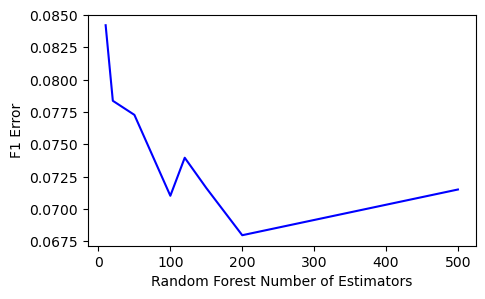

In [ ]:
plt.figure(figsize = (5,3))
ax = plt.axes()

plt.plot(estimators,F1_scores_estimators, color='b', label = 'F1 Error')
plt.xlabel('Random Forest Number of Estimators')
plt.ylabel('F1 Error')
plt.show()

The plot above shows that for trees with maximum depth of 15, the best value for the number of decision trees within the random forest is 150. If we run the cells above multiple times we can see that the number of estimators with the smallest F1 error is dynamic, i.e. it keeps changing. This means that we cannot say for sure if 150 is the best number of trees, however since this is our initial model we do not need to be correct, we will tune the hyperparameters in the next step. For now, we will set the number of trees to 150 and vary the maximum depth of the trees. The reason this varies each time is because different decision trees are created in each run, hence affecting the optimal number of trees. Since we set the max_depth = 15, it does not matter too much if the number of estimators is incorrect. When we apply cross validation to optimize the hyperparaeters later we can select the optimal n_estimators and max_depth. This step is only for us to obtain a baseline.

In [ ]:
## Simple loop to check decision tree max_depth

F1_scores = []

for n in range(1,16):
    model = RandomForestClassifier(n_estimators = 150, max_depth = n, class_weight = 'balanced')
    model_fit = model.fit(Xtrain1, y_train)
    pred = model_fit.predict(Xtrain1)
    score = 1-(f1_score(y_train, pred))
    F1_scores.append(score)

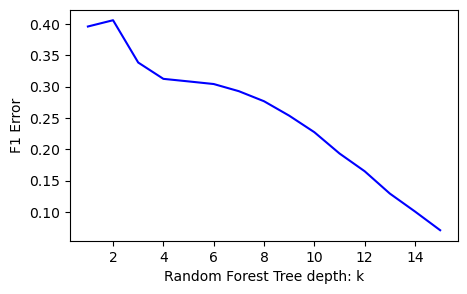

In [ ]:
plt.figure(figsize = (5,3))
ax = plt.axes()

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.plot(x,F1_scores, color='b', label = 'F1 Error')
plt.xlabel('Random Forest Tree depth: k')
plt.ylabel('F1 Error')
plt.show()

From the plot above we can see that when k = 15 the error is at it's lowest, so we can take max_depth = 15 for our initial model and n_estimators = 150.

Lets check how good our initial model is by calculating some metrics. First we will obtain the confustion matrix.

In [ ]:
## Fitting and predicting initial model on training data

RF = RandomForestClassifier(max_depth = 15, n_estimators = 150, class_weight = 'balanced')

RF_initial = RF.fit(Xtrain1, y_train)
RF_initial_pred = RF_initial.predict(Xtrain1)

In [ ]:
RF_initial_pred

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
## Obtaining the confustion matrix

RF_initial_cm = confusion_matrix(y_train, RF_initial_pred)
RF_initial_cm

array([[14339,   397],
       [  407,  5042]])

In [ ]:
RF_initial_pred

array([0, 1, 0, ..., 0, 1, 0])

/Users/dinaranchhod/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


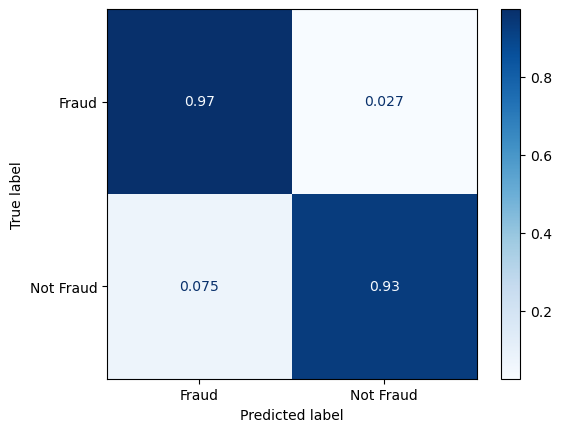

In [ ]:
## Plotting the normalised confusion matrix

target_labels = ['Fraud', 'Not Fraud']
RF_initial_cmplot = plot_confusion_matrix(RF_initial, Xtrain1, y_train, display_labels=target_labels,
                                        cmap=plt.cm.Blues, normalize = 'true')

In [ ]:
RF_initial_pred

array([0, 1, 0, ..., 0, 1, 0])

Now we can calculate some metrics based on the confusion matrix. We can compare these scores the scores obtained after optimizing the hyperparameters.

In [ ]:
## Helper function to obtain Detect/Recall scores

def det_scores(y_true, y_pred):
    cm_det = confusion_matrix(y_true, y_pred, normalize='true')

    det_plus = cm_det[0,0]
    det_minus = cm_det[1,1]

    print('pr(det+) = ', det_plus)
    print('pr(det-) = ', det_minus)

    return det_plus, det_minus


## Helper function to obtain Predict/Precision scores

def pred_scores(y_true, y_pred):
    cm_pred = confusion_matrix(y_true, y_pred, normalize='pred')

    pred_plus = cm_pred[0,0]
    pred_minus = cm_pred[1,1]

    print('pr(pred+) = ', pred_plus)
    print('pr(pred-) = ', pred_minus)

    return pred_plus, pred_minus

In [ ]:
## Accuracy metrics for initial model

RF_initial_det = det_scores(y_train, RF_initial_pred)
RF_initial_predict = pred_scores(y_train, RF_initial_pred)
RF_initial_acc = accuracy_score(y_train, RF_initial_pred, normalize = True)
RF_initial_bacc = balanced_accuracy_score(y_train, RF_initial_pred)
RF_initial_F1 = f1_score(y_train, RF_initial_pred, labels = target_labels)
RF_initial_MCC = matthews_corrcoef(y_train, RF_initial_pred)

print('Accuracy = ', RF_initial_acc)
print('Balanced Accuracy = ',RF_initial_bacc)
print('F1 score = ',RF_initial_F1)
print('MCC = ',RF_initial_MCC)

pr(det+) =  0.9730591748099892
pr(det-) =  0.92530739585245
pr(pred+) =  0.972399294723993
pr(pred-) =  0.9270086412943556
Accuracy =  0.9601684419123111
Balanced Accuracy =  0.9491832853312197
F1 score =  0.9261572373254959
MCC =  0.8988871025370129


In [ ]:
## Error metrics for initial model

RF_ini_detplus_er = 1-RF_initial_det[0]
RF_ini_detminus_er = 1-RF_initial_det[1]
RF_ini_predplus_er = 1-RF_initial_predict[0]
RF_ini_predminus_er = 1-RF_initial_predict[1]
RF_ini_acc_er = 1 - RF_initial_acc
RF_ini_bacc_er = 1 - RF_initial_bacc
RF_ini_F1_er = 1 - RF_initial_F1
RF_ini_MCC_er = 1 - RF_initial_MCC


print('pr(det+) Error = ',RF_ini_detplus_er)
print('pr(det-) Error = ',RF_ini_detminus_er)
print('pr(pred+) Error = ',RF_ini_predplus_er)
print('pr(pred-) Error = ',RF_ini_predminus_er)
print('Accuracy Error = ', RF_ini_acc_er)
print('Balanced Accuracy Error = ',RF_ini_bacc_er)
print('F1 Error = ',RF_ini_F1_er)
print('MCC Error = ',RF_ini_MCC_er)

pr(det+) Error =  0.026940825190010842
pr(det-) Error =  0.07469260414754997
pr(pred+) Error =  0.027600705276006998
pr(pred-) Error =  0.07299135870564444
Accuracy Error =  0.0398315580876889
Balanced Accuracy Error =  0.05081671466878035
F1 Error =  0.07384276267450407
MCC Error =  0.10111289746298713


As we saw earlier, the datset has imbalanced classes, hence holisitic metrics such as balanced accuracy, F1 score and MCC are more reliable measures of model perfomance. This is because holistic measures look at both the positive and negative classes and consider the detect (recall) as well as the predict (precision).

The balanced accuracy of the initial model is 95%, the F1 score is 93% and the MCC is 90%. Overall the initial model is a good fit for the data.

We will be mainly be looking at the F1 score since it is more robust to imbalanced datasets and will base comparisons on this.

### c) Optimising hyper parameters

We have established a baseline; we can now optimise the hyperparameters of the model. This is usually performed with the help of cross validation. Cross validation is an effective method for selecting hyperparameters that provide the lowest generalisation error. The generalisation is a measure of the general relationship between attributes and the class. This ability is vital to the effectiveness of a model and we wish to minimise the error as much as possible. Using cross validation, we can select the hyperparameter, or combination of hyperparameters that minimises this. The training data is partitioned into k parts (or folds). One of the folds is held back while the model is trained on the remaining folds. Then this model is tested on the held back/unseen data and a generalisation error is calculated. This is repeated for all folds and an average generalisation error is calculated for that hyperparameter or combination of hyperparameters. The process is repeated for all possible (combinations of) hyperparameters. We want to find the hyperparameter, or combination, that gives the smallest average genralisation error.

Decision trees have 2 main hyperparameters, n_estimators, which is the number of trees the random forest will generate, and max_depth, the maximum number of branches on each decision tree.

For n_estimators we will try 10, 100, 500 and 200. For the max_depth we will try 11-15. We need to be cautious when selecting these values since it can become computationally very expensive to run as the complexity increases. Here we have tried to find an acceptable balance.

In [ ]:
## Defining the model and variations for the hyperparameters

RForest = RandomForestClassifier(class_weight = 'balanced')

n_estimators = [10, 100, 150, 200]
max_depth = [11,12,13,14,15]

In [ ]:
RF_grid = dict(n_estimators = n_estimators, max_depth = max_depth)
RF_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
RF_grid_search = GridSearchCV(estimator = RForest, param_grid = RF_grid, n_jobs = -1, cv = RF_cv, scoring = 'f1',
                           error_score = 0)

In [ ]:
import time

start_time = time.time()

RF_grid_result = RF_grid_search.fit(Xtrain1, y_train)

tme = time.time() - start_time
tme

457.71728587150574

The timer above shows that this cross validation took almost 8 minutes to run. This is expected since the Random Forest classifier takes longer to run in comparison to other classification models due to the nature of it. RandomForest is an ensemble method, so for each pair of parameters many decision trees are generated and the final classification is produced using a voting system based on the classifications produced by each desision tree.

In [ ]:
print("Best: %f using %s" % (RF_grid_result.best_score_, RF_grid_result.best_params_))

Best: 0.795645 using {'max_depth': 15, 'n_estimators': 200}


In [ ]:
RF_means = RF_grid_result.cv_results_['mean_test_score']
RF_stds = RF_grid_result.cv_results_['std_test_score']
RF_params = RF_grid_result.cv_results_['params']

for mean, stdev, param in zip(RF_means, RF_stds, RF_params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.744153 (0.015231) with: {'max_depth': 11, 'n_estimators': 10}
0.748276 (0.016054) with: {'max_depth': 11, 'n_estimators': 100}
0.748639 (0.017208) with: {'max_depth': 11, 'n_estimators': 150}
0.748490 (0.016089) with: {'max_depth': 11, 'n_estimators': 200}
0.755053 (0.015244) with: {'max_depth': 12, 'n_estimators': 10}
0.763150 (0.015258) with: {'max_depth': 12, 'n_estimators': 100}
0.763825 (0.015961) with: {'max_depth': 12, 'n_estimators': 150}
0.764331 (0.015452) with: {'max_depth': 12, 'n_estimators': 200}
0.761919 (0.016076) with: {'max_depth': 13, 'n_estimators': 10}
0.776726 (0.014936) with: {'max_depth': 13, 'n_estimators': 100}
0.778344 (0.015352) with: {'max_depth': 13, 'n_estimators': 150}
0.778171 (0.014965) with: {'max_depth': 13, 'n_estimators': 200}
0.769661 (0.015859) with: {'max_depth': 14, 'n_estimators': 10}
0.787665 (0.014390) with: {'max_depth': 14, 'n_estimators': 100}
0.787275 (0.014576) with: {'max_depth': 14, 'n_estimators': 150}
0.787489 (0.015175) with: {'m

The best model according to the cross validation is still the initial model with n_estimators = 150 and max_depth = 15. The F1 score produced from the cross validation is 80%, this is lower than than the F1 score produced in the initial model. This is because the cross validated estimate of the model generalisation is less biased. In the initial model we trained and tested the model on the same set of training data. In the cross validation, part of the dataset is held back to test the model on.

### d) Performance metrics for training

Now we have found the optimal hyperparameters using cross validaton, we can evaluate the performance by calculating the confusion matrix and some metrics:
- detect/recall
- predict/precision
- accuracy
- balanced accuracy
- F1 score
- MCC

In [ ]:
## Fitting and predicting the optimised model on training data

RandForest = RandomForestClassifier(n_estimators = 150, max_depth = 15, class_weight = 'balanced')

RF_opt = RandForest.fit(Xtrain1, y_train)
RF_opt_pred = RF_opt.predict(Xtrain1)

In [ ]:
## Obtaining the Confusion Matrix

RF_opt_cm = confusion_matrix(y_train, RF_opt_pred)
RF_opt_cm

array([[14338,   398],
       [  413,  5036]])

/Users/dinaranchhod/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


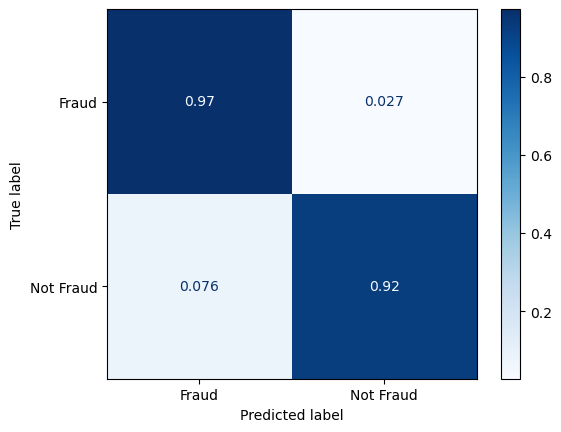

In [ ]:
## Plotting the normalised confusion matrix

target_labels = ['Fraud', 'Not Fraud']
RF_opt_cmplot = plot_confusion_matrix(RF_opt, Xtrain1, y_train, display_labels=target_labels,
                                   cmap=plt.cm.Blues, normalize = 'true')

In [ ]:
## Accuracy metrics for generalisation of optimized model

RF_opt_det = det_scores(y_train, RF_opt_pred)
RF_opt_predict = pred_scores(y_train, RF_opt_pred)
RF_opt_acc = accuracy_score(y_train, RF_opt_pred, normalize = True)
RF_opt_bacc = balanced_accuracy_score(y_train, RF_opt_pred)
RF_opt_F1 = f1_score(y_train, RF_opt_pred, labels = target_labels)
RF_opt_MCC = matthews_corrcoef(y_train, RF_opt_pred)

print('Accuracy = ', RF_opt_acc)
print('Balanced Accuracy = ',RF_opt_bacc)
print('F1 score = ',RF_opt_F1)
print('MCC = ',RF_opt_MCC)

pr(det+) =  0.9729913137893594
pr(det-) =  0.9242062763809873
pr(pred+) =  0.9720018981763948
pr(pred-) =  0.9267574530732425
Accuracy =  0.9598216497399059
Balanced Accuracy =  0.9485987950851733
F1 score =  0.9254801065882569
MCC =  0.897978131183738


In [ ]:
## Error metrics for generalisation error of optimized model

RF_opt_detplus_er = 1-RF_opt_det[0]
RF_opt_detminus_er = 1-RF_opt_det[1]
RF_opt_predplus_er = 1-RF_opt_predict[0]
RF_opt_predminus_er = 1-RF_opt_predict[1]
RF_opt_acc_er = 1 - RF_opt_acc
RF_opt_bacc_er = 1 - RF_opt_bacc
RF_opt_F1_er = 1 - RF_opt_F1
RF_opt_MCC_er = 1 - RF_opt_MCC


print('pr(det+) Error = ',RF_opt_detplus_er)
print('pr(det-) Error = ',RF_opt_detminus_er)
print('pr(pred+) Error = ',RF_opt_predplus_er)
print('pr(pred-) Error = ',RF_opt_predminus_er)
print('Accuracy Error = ', RF_opt_acc_er)
print('Balanced Accuracy Error = ',RF_opt_bacc_er)
print('F1 Error = ',RF_opt_F1_er)
print('MCC Error = ',RF_opt_MCC_er)

pr(det+) Error =  0.027008686210640565
pr(det-) Error =  0.07579372361901271
pr(pred+) Error =  0.02799810182360518
pr(pred-) Error =  0.07324254692675747
Accuracy Error =  0.04017835026009409
Balanced Accuracy Error =  0.05140120491482669
F1 Error =  0.07451989341174314
MCC Error =  0.10202186881626196


Applying the model to the training data obtains a similar balanced accuracy, F1 score and MCC score since the hyperparameters are the same. The MCC has decreased slightly to 90% from 91%. We should have more confidence in these parameters since they resultd in the smallest generalisation error in the cross validation, not because we happened to select them for our initial model.

## 5. Technique 2 (20 marks)

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process

Logistic regression is another supervised classification technique. We call it supervised since the training set is used to build the model and the testing set is used to fine-tune, refine  and evaluate performance of the model. This method is used for binary classification, there can only be 2 classes.

The output of a logistic regression classification model is the probability of a certain data point belonging to a certain class instead of the class itself. Then we can infer the predicted class by classing any predictions greater than or equal to 0.5 as belonging to the positive class (class = 1), and if the probability is less than 0.5 then it belongs to the other class (class = 0).

![Logistic%20Regression%20Schematic%20diagram.png](attachment:Logistic%20Regression%20Schematic%20diagram.png)

### b) Setting hyper parameters with rationale

As we did for Random Forests we can make some initial plots, varying the hyperparameters to obtain some values for an initial model. First let's split the data into trainng and testing sets, then we can vary the solver used.

In [ ]:
F1score_LR = []
target_labels = ['not fraud', 'fraud']
solver = ['lbfgs', 'liblinear', 'saga', 'sag']
for s in solver:
    model = LogisticRegression(solver = s, class_weight = 'balanced', max_iter = 1000)
    model_fit = model.fit(Xtrain1, y_train)
    pred = model_fit.predict(Xtrain1)
    score = 1-(f1_score(y_train, pred, labels = target_labels))
    F1score_LR.append(score)

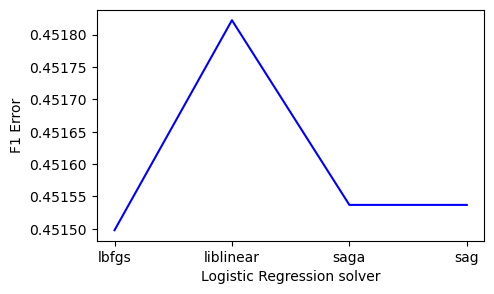

In [ ]:
plt.figure(figsize = (5,3))
ax = plt.axes()

plt.plot(solver,F1score_LR, color='b', label = 'F1 Error')
plt.xlabel('Logistic Regression solver')
plt.ylabel('F1 Error')
plt.show()

From the plot above we can see that the lbfgs solver provides a model with the smallest error in comparison to the other solvers. However if we run the 2 cells above multiple times the plot changes, hence again we cannot be sure if this is the best solver. Since this is our initial model it does not matter too much if we have the best solver.

We can now fix the solver hyperparameter to lbfgs and we can vary the value of C, the regularisation strength.

In [ ]:
F1score_LR1 = []
target_labels = ['not fraud', 'fraud']
C = [1.0, 10.0, 100.0]
for c in C:
    model = LogisticRegression(solver = 'lbfgs', class_weight = 'balanced', max_iter = 1000, C = c)
    model_fit = model.fit(Xtrain1, y_train)
    pred = model_fit.predict(Xtrain1)
    score = 1-(f1_score(y_train, pred, labels = target_labels))
    F1score_LR1.append(score)

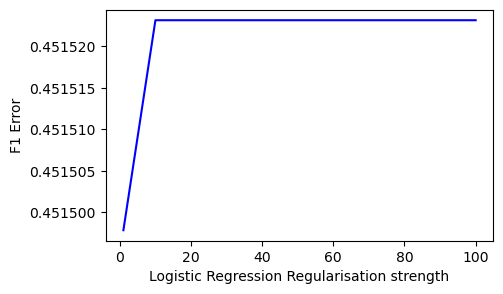

In [ ]:
plt.figure(figsize = (5,3))
ax = plt.axes()

plt.plot(C,F1score_LR1, color='b', label = 'F1 Error')
plt.xlabel('Logistic Regression Regularisation strength')
plt.ylabel('F1 Error')
plt.show()

The plot above shows that we have the smallestst error when C = 1. Regularisation is used to overcome problems related to overfitting by limiting the complexity of the model. A higher reularisation strength penalises particularly noisy data points.

Now we have obtained the hyperparameters for the initial model, we can fit the model to the training data. We can set the solver to lbfgs and C = 1.

As we did earlier for the Random Forest model, we will obtain the confusion matrix and calculate the metrics for this model.

In [ ]:
## Fitting and predicting initial model on training data

LR = LogisticRegression(solver = 'lbfgs', class_weight = 'balanced', max_iter = 1000, C = 1)

LR_initial = LR.fit(Xtrain1, y_train)
LR_initial_pred = LR_initial.predict(Xtrain1)

In [ ]:
## Obtaining the confusion matrix

LR_initial_cm = confusion_matrix(y_train, LR_initial_pred)
LR_initial_cm

array([[10010,  4726],
       [ 1604,  3845]])

/Users/dinaranchhod/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


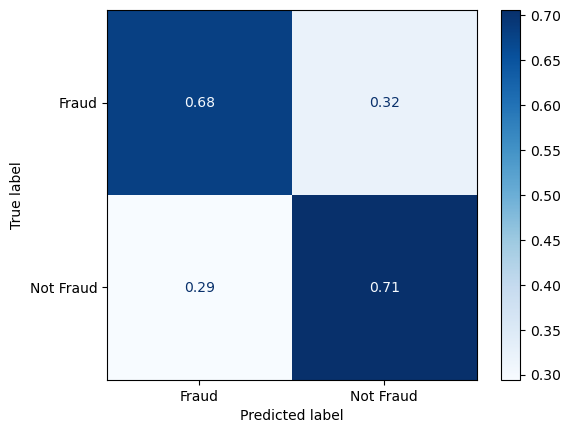

In [ ]:
## Plotting the normalised confusion matrix

target_labels = ['Fraud', 'Not Fraud']
LR_initial_cmplot = plot_confusion_matrix(LR_initial, Xtrain1, y_train, display_labels=target_labels,
                                        cmap=plt.cm.Blues,normalize = 'true')

In [ ]:
## Accuracy metrics for initial model

LR_initial_det = det_scores(y_train, LR_initial_pred)
LR_initial_predict = pred_scores(y_train, LR_initial_pred)
LR_initial_acc = accuracy_score(y_train, LR_initial_pred, normalize = True)
LR_initial_bacc = balanced_accuracy_score(y_train, LR_initial_pred)
LR_initial_F1 = f1_score(y_train, LR_initial_pred, labels = target_labels)
LR_initial_MCC = matthews_corrcoef(y_train, LR_initial_pred)

print('Accuracy = ', LR_initial_acc)
print('Balanced Accuracy = ',LR_initial_bacc)
print('F1 score = ',LR_initial_F1)
print('MCC = ',LR_initial_MCC)

pr(det+) =  0.6792888165038002
pr(det-) =  0.7056340612956505
pr(pred+) =  0.8618908214224212
pr(pred-) =  0.4486057636215144
Accuracy =  0.6864007926678226
Balanced Accuracy =  0.6924614388997254
F1 score =  0.5485021398002854
MCC =  0.34571265389339395


In [ ]:
## Error metrics for initial model

LR_initial_detplus_er = 1-LR_initial_det[0]
LR_initial_detminus_er = 1-LR_initial_det[1]
LR_initial_predplus_er = 1-LR_initial_predict[0]
LR_initial_predminus_er = 1-LR_initial_predict[1]
LR_initial_acc_er = 1 - LR_initial_acc
LR_initial_bacc_er = 1 - LR_initial_bacc
LR_initial_F1_er = 1 - LR_initial_F1
LR_initial_MCC_er = 1 - LR_initial_MCC


print('pr(det+) Error = ',LR_initial_detplus_er)
print('pr(det-) Error = ',LR_initial_detminus_er)
print('pr(pred+) Error = ',LR_initial_predplus_er)
print('pr(pred-) Error = ',LR_initial_predminus_er)
print('Accuracy Error = ', LR_initial_acc_er)
print('Balanced Accuracy Error = ',LR_initial_bacc_er)
print('F1 Error = ',LR_initial_F1_er)
print('MCC Error = ',LR_initial_MCC_er)

pr(det+) Error =  0.32071118349619976
pr(det-) Error =  0.29436593870434946
pr(pred+) Error =  0.13810917857757876
pr(pred-) Error =  0.5513942363784856
Accuracy Error =  0.3135992073321774
Balanced Accuracy Error =  0.30753856110027455
F1 Error =  0.4514978601997146
MCC Error =  0.6542873461066061


From the metrics above we can see the balanced accuracy is 70%, the F1 score is 55% and the MCC is 35%. We can compare the optimised model to this baseline to see if we have any improvement after finding optimal hyperparameters.

### c) Optimising hyper parameters
As we did earlier, we can use cross validation to find hyperparameters for the Logistic regression model that produces the smallest generalisation error. We can vary the solvers and reguralisation strength.

In [ ]:
## Defining the model and options for the hyperparameters

LogR = LogisticRegression(class_weight = 'balanced', max_iter = 1000)

solvers = ['lbfgs', 'liblinear', 'sag', 'saga']
c_values = [100, 10, 1, 0.1, 0.01]

In [ ]:
## defining the gridsearch

LR_grid = dict(solver = solvers, C = c_values)
LR_cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 5, random_state = 1)
LR_grid_search = GridSearchCV(estimator = LogR, param_grid = LR_grid, n_jobs = 1, cv = LR_cv,
                              scoring = 'f1')

In [ ]:
import time
start_time = time.time()

LR_grid_result = LR_grid_search.fit(Xtrain1, y_train)

tme = time.time() - start_time
tme

101.89121103286743

In [ ]:
print("Best: %f using %s" % (LR_grid_result.best_score_, LR_grid_result.best_params_))

Best: 0.547909 using {'C': 10, 'solver': 'lbfgs'}


In [ ]:
LR_means = LR_grid_result.cv_results_['mean_test_score']
LR_stds = LR_grid_result.cv_results_['std_test_score']
LR_params = LR_grid_result.cv_results_['params']

for mean, stdev, param in zip(LR_means, LR_stds, LR_params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.547885 (0.014055) with: {'C': 100, 'solver': 'lbfgs'}
0.547908 (0.014036) with: {'C': 100, 'solver': 'liblinear'}
0.547893 (0.014048) with: {'C': 100, 'solver': 'sag'}
0.547893 (0.014058) with: {'C': 100, 'solver': 'saga'}
0.547909 (0.014060) with: {'C': 10, 'solver': 'lbfgs'}
0.547906 (0.014074) with: {'C': 10, 'solver': 'liblinear'}
0.547864 (0.014061) with: {'C': 10, 'solver': 'sag'}
0.547890 (0.014070) with: {'C': 10, 'solver': 'saga'}
0.547790 (0.014115) with: {'C': 1, 'solver': 'lbfgs'}
0.547839 (0.014030) with: {'C': 1, 'solver': 'liblinear'}
0.547805 (0.014131) with: {'C': 1, 'solver': 'sag'}
0.547822 (0.014129) with: {'C': 1, 'solver': 'saga'}
0.547405 (0.014001) with: {'C': 0.1, 'solver': 'lbfgs'}
0.547560 (0.013637) with: {'C': 0.1, 'solver': 'liblinear'}
0.547415 (0.014000) with: {'C': 0.1, 'solver': 'sag'}
0.547420 (0.013921) with: {'C': 0.1, 'solver': 'saga'}
0.545291 (0.013462) with: {'C': 0.01, 'solver': 'lbfgs'}
0.546263 (0.013893) with: {'C': 0.01, 'solver': 'liblin

From the cross validation above we can see that the optimal solver is the lbfgs solver and the optimal regularisation strength is 10. We can fit and predict using this model on the training data and compare the metrics to the initial model.

### d) Performance metrics for training

In [ ]:
## Fitting and predicting the optimised model on training data

LogRegression = LogisticRegression(solver = 'lbfgs', C = 10, class_weight = 'balanced', max_iter = 1000)

LR_opt = LogRegression.fit(Xtrain1, y_train)
LR_opt_pred = LR_opt.predict(Xtrain1)

In [ ]:
## Obtaining the Confusion Matrix

LR_opt_cm = confusion_matrix(y_train, LR_opt_pred)
LR_opt_cm

array([[10012,  4724],
       [ 1605,  3844]])

/Users/dinaranchhod/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


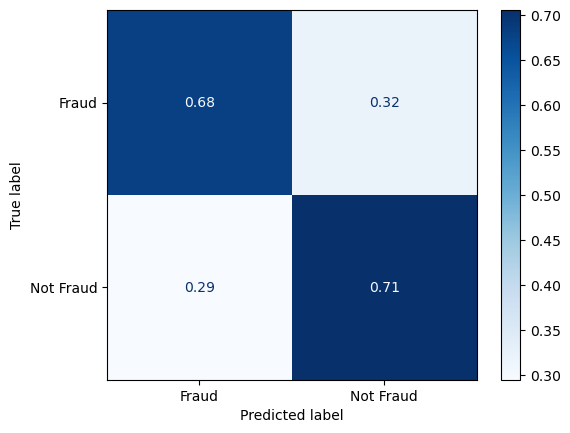

In [ ]:
## Plotting the normalised confusion matrix

target_labels = ['Fraud', 'Not Fraud']
LR_opt_cmplot = plot_confusion_matrix(LR_opt, Xtrain1, y_train, display_labels=target_labels,
                                   cmap=plt.cm.Blues, normalize = 'true')

In [ ]:
## Accuracy metrics for generalisation of optimized model

LR_opt_det = det_scores(y_train, LR_opt_pred)
LR_opt_predict = pred_scores(y_train, LR_opt_pred)
LR_opt_acc = accuracy_score(y_train, LR_opt_pred, normalize = True)
LR_opt_bacc = balanced_accuracy_score(y_train, LR_opt_pred)
LR_opt_F1 = f1_score(y_train, LR_opt_pred, labels = target_labels)
LR_opt_MCC = matthews_corrcoef(y_train, LR_opt_pred)

print('Accuracy = ', LR_opt_acc)
print('Balanced Accuracy = ',LR_opt_bacc)
print('F1 score = ',LR_opt_F1)
print('MCC = ',LR_opt_MCC)

pr(det+) =  0.6794245385450597
pr(det-) =  0.7054505413837401
pr(pred+) =  0.8618404063011105
pr(pred-) =  0.44864612511671337
Accuracy =  0.6864503344067376
Balanced Accuracy =  0.6924375399643998
F1 score =  0.5484768495398444
MCC =  0.34568559211551


In [ ]:
## Error metrics for initial model

LR_opt_detplus_er = 1-LR_opt_det[0]
LR_opt_detminus_er = 1-LR_opt_det[1]
LR_opt_predplus_er = 1-LR_opt_predict[0]
LR_opt_predminus_er = 1-LR_opt_predict[1]
LR_opt_acc_er = 1 - LR_opt_acc
LR_opt_bacc_er = 1 - LR_opt_bacc
LR_opt_F1_er = 1 - LR_opt_F1
LR_opt_MCC_er = 1 - LR_opt_MCC

print('pr(det+) Error = ',LR_opt_detplus_er)
print('pr(det-) Error = ',LR_opt_detminus_er)
print('pr(pred+) Error = ',LR_opt_predplus_er)
print('pr(pred-) Error = ',LR_opt_predminus_er)
print('Accuracy Error = ', LR_opt_acc_er)
print('Balanced Accuracy Error = ',LR_opt_bacc_er)
print('F1 Error = ',LR_opt_F1_er)
print('MCC Error = ',LR_opt_MCC_er)

pr(det+) Error =  0.3205754614549403
pr(det-) Error =  0.2945494586162599
pr(pred+) Error =  0.13815959369888953
pr(pred-) Error =  0.5513538748832867
Accuracy Error =  0.31354966559326236
Balanced Accuracy Error =  0.30756246003560017
F1 Error =  0.45152315046015556
MCC Error =  0.65431440788449


We have used the optimised model to generate predictions on the training set and obtained some metrics. Comparing this to the initial model, the balanced accuracy has dropped slightly from 70% to 69%, the F1 score and MCC has remained the same at 55% and 35%. Despite the metrics not improving after optimising the hyperparameters we can have more confidence in the generalisation ability since the optimised model was tested on unseen data.

## 6. Comparison of metrics performance for testing (16 marks)

### a) Use of cross validation for both techniques to deal with over-fitting

We used cross validation earlier to optimise the hyperparameters for the Random Forest and Logistic Regression models. We can use nested cross validation to evaluate which classification technique is better overall. Nested cross evaluation involves an inner and outer cross validation. The inner cross validation is identical to the cross validation we used when optimising the hyperparameters. This time the whole dataset is used and split into k folds, the training folds are split again and the inner cross validation is performed and then tsted on the held back fold. Nested cross validation is used to obtain an unbiased estimate of generalisation ability and is a method of model evaluation as opposed to model selection.

In [ ]:
X = fraudclaims.loc[:, fraudclaims.columns !='Fraud']
y = fraudclaims['Fraud']

X1 = preprocessor.fit_transform(X)

In [ ]:
cv_inner = KFold(n_splits = 4, shuffle = True, random_state = 1)
cv_outer = KFold(n_splits=8, shuffle=True, random_state=1)

In [ ]:
## Nested Cross Validation for Random Forest
model_RF = RandomForestClassifier(class_weight = 'balanced')
n_estimators = [10, 100, 150, 200]
max_depth = [12,13,14,15,16]
grid_nrf = dict(n_estimators = n_estimators, max_depth = max_depth)
search_rf = GridSearchCV(model_RF, param_grid = grid_nrf, n_jobs = 1, cv = cv_inner)
scores_rf = cross_val_score(search_rf, X1, y, scoring = 'f1', cv = cv_outer, n_jobs = -1)

In [ ]:
## Nested Cross Validation for Logistic Regression
model_LR = LogisticRegression(class_weight = 'balanced', max_iter = 1000)
solvers = ['lbfgs','liblinear','sag','saga']
c_values = [100,10,1,0.1,0.01]
grid_nlr = dict(solver = solvers, C = c_values)
search_lr = GridSearchCV(model_LR, param_grid = grid_nlr, n_jobs = 1, cv = cv_inner)
scores_lr = cross_val_score(search_lr, X1, y, scoring = 'f1', cv = cv_outer, n_jobs = -1)

In [ ]:
print('F1 Score for Random Forest: %.3f (%.3f)' % (np.mean(scores_rf), np.std(scores_rf)))
print('F1 Score for Logistic Regression: %.3f (%.3f)' % (np.mean(scores_lr), np.std(scores_lr)))

F1 Score for Random Forest: 0.810 (0.013)
F1 Score for Logistic Regression: 0.546 (0.014)


The scores obtained above are unbiased estimates of the generalisation ability of each classification model. As we can see the random forest model is far better in comparison to the logistic regression model with only 0.2 generalisation error. This suggests that the random forest model is a better classifier for this task, however, we should apply our models to the training data before deciding on our model.

### b) Comparison with appropriate metrics for testing
We will use the optimised hyperparameters from the earlier steps to train the model on the training data and use this to make predictions on the testing data. We can then obtain the confusion matrices and calculate the metrics to compare the two classification models.

First the Random Forest classification model:

In [ ]:
## Appying optimised Random Forest to test data

RandomForr = RandomForestClassifier(n_estimators = 150, max_depth = 15, class_weight = 'balanced')

Xtest1 = preprocessor.fit_transform(X_test)

In [ ]:
RF_test = RandomForr.fit(Xtrain1, y_train)
RF_test_pred = RF_test.predict(Xtest1)

In [ ]:
## Obtaining the Confusion Matrix

RF_test_cm = confusion_matrix(y_test, RF_test_pred)
RF_test_cm

array([[5921,  394],
       [ 546, 1790]])

/Users/dinaranchhod/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


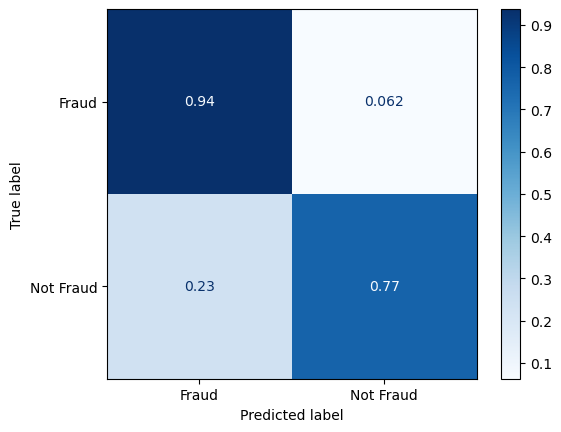

In [ ]:
## Plotting the normalised confusion matrix

target_lables = ['Fraud', 'Not Fraud']
RF_test_cmplot = plot_confusion_matrix(RF_test, Xtest1, y_test, display_labels=target_labels,
                                      cmap=plt.cm.Blues, normalize = 'true')

In [ ]:
## Accuracy metrics for Random Forest

RF_test_det = det_scores(y_test, RF_test_pred)
RF_test_predict = pred_scores(y_test, RF_test_pred)
RF_test_acc = accuracy_score(y_test, RF_test_pred, normalize = True)
RF_test_bacc = balanced_accuracy_score(y_test, RF_test_pred)
RF_test_F1 = f1_score(y_test, RF_test_pred, labels=target_labels)
RF_test_MCC = matthews_corrcoef(y_test, RF_test_pred)

pr(det+) =  0.9376088677751385
pr(det-) =  0.7662671232876712
pr(pred+) =  0.9155713623009123
pr(pred-) =  0.8195970695970696


Now the Logistic Regression classification model:

In [ ]:
## Appying optimised Logistic Regression to test data

LogisticR = LogisticRegression(solver = 'lbfgs', C = 10, class_weight = 'balanced', max_iter = 1000)

LR_test = LogisticR.fit(Xtrain1, y_train)
LR_test_pred = LR_test.predict(Xtest1)

In [ ]:
## Obtaining the Confusion Matrix

LR_test_cm = confusion_matrix(y_test, LR_test_pred)
LR_test_cm

array([[4286, 2029],
       [ 698, 1638]])

/Users/dinaranchhod/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


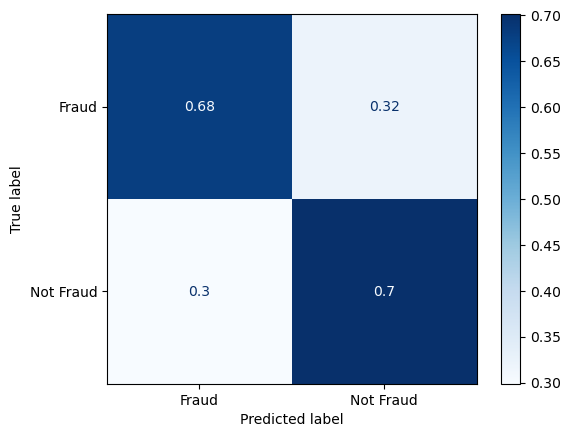

In [ ]:
## Plotting the normalised confusion matrix

target_lables = ['Fraud', 'Not Fraud']
LR_test_cmplot = plot_confusion_matrix(LR_test, Xtest1, y_test, display_labels=target_labels,
                                      cmap=plt.cm.Blues, normalize = 'true')

In [ ]:
## Accuracy metrics for Logistic Regression

LR_test_det = det_scores(y_test, LR_test_pred)
LR_test_predict = pred_scores(y_test, LR_test_pred)
LR_test_acc = accuracy_score(y_test, LR_test_pred, normalize = True)
LR_test_bacc = balanced_accuracy_score(y_test, LR_test_pred)
LR_test_F1 = f1_score(y_test, LR_test_pred, labels=target_labels)
LR_test_MCC = matthews_corrcoef(y_test, LR_test_pred)

pr(det+) =  0.678701504354711
pr(det-) =  0.7011986301369864
pr(pred+) =  0.8599518459069021
pr(pred-) =  0.4466866648486501


In [ ]:
## Detect+ scores

print('Det(+) Random Forest = ', RF_test_det[0])
print('Det(+) Logistic Regression = ', LR_test_det[0])

print('Error Det(+) Random Forest = ', (1-RF_test_det[0]))
print('Error Det(+) Logistic Regression = ',(1-LR_test_det[0]))

Det(+) Random Forest =  0.9376088677751385
Det(+) Logistic Regression =  0.678701504354711
Error Det(+) Random Forest =  0.06239113222486148
Error Det(+) Logistic Regression =  0.321298495645289


In [ ]:
## Detect- scores

print('Det(-) Random Forest = %.3f' % RF_test_det[1])
print('Det(-) Logistic Regression = %.3f' % LR_test_det[1])

print('Error Det(-) Random Forest = %.3f' % (1-RF_test_det[1]))
print('Error Det(-) Logistic Regression = %.3f' % (1-LR_test_det[1]))

Det(-) Random Forest = 0.766
Det(-) Logistic Regression = 0.701
Error Det(-) Random Forest = 0.234
Error Det(-) Logistic Regression = 0.299


In [ ]:
## Predict+ scores

print('Pred(+) Random Forest = %.3f' % RF_test_predict[0])
print('Pred(+) Logistic Regression = %.3f' % LR_test_predict[0])

print('Error Pred(+) Random Forest = %.3f' % (1-RF_test_predict[0]))
print('Error Pred(+) Logistic Regression = %.3f' % (1-LR_test_predict[0]))

Pred(+) Random Forest = 0.916
Pred(+) Logistic Regression = 0.860
Error Pred(+) Random Forest = 0.084
Error Pred(+) Logistic Regression = 0.140


In [ ]:
## Predict- scores

print('Pred(-) Random Forest = %.3f' % RF_test_predict[1])
print('Pred(-) Logistic Regression = %.3f' % LR_test_predict[1])

print('Error Pred(-) Random Forest = %.3f' % (1-RF_test_predict[1]))
print('Error Pred(-) Logistic Regression = %.3f' % (1-LR_test_predict[1]))

Pred(-) Random Forest = 0.820
Pred(-) Logistic Regression = 0.447
Error Pred(-) Random Forest = 0.180
Error Pred(-) Logistic Regression = 0.553


Looking at the detect and predict scores for both models , the Random Forest outperforms the Logistic Regression in every case. However as we know, our data is imbalanced so these metrics aren't as reliable as the holistic metrics.

In [ ]:
## Accuracy scores

print('Accuracy Random Forest = %.3f' % RF_test_acc)
print('Accuracy Logistic Regression = %.3f' % LR_test_acc)

print('Error Random Forest = %.3f' % (1-RF_test_acc))
print('Error Logistic Regression = %.3f' % (1-LR_test_acc))

Accuracy Random Forest = 0.891
Accuracy Logistic Regression = 0.685
Error Random Forest = 0.109
Error Logistic Regression = 0.315


In [ ]:
## Balanced Accuracy scores

print('Balanced Accuracy Random Forest = %.3f' % RF_test_bacc)
print('Balanced Accuracy Logistic Regression = %.3f' % LR_test_bacc)

print('Balanced Error Random Forest = %.3f' % (1-RF_test_bacc))
print('Balanced Error Logistic Regression = %.3f' % (1-LR_test_bacc))

Balanced Accuracy Random Forest = 0.852
Balanced Accuracy Logistic Regression = 0.690
Balanced Error Random Forest = 0.148
Balanced Error Logistic Regression = 0.310


When we have imbalanced datasets, the accuracy and balanced accuracy do not equal each other. Here we can see that the accuracy and balanced accuracy scores are different, which confirms that holistic measures are more reliable in such cases.

The balanced accuracy of the Random Forest is much higher than the Logistic Regression. However, from the brief, the client was aiming for a classification model with only 5% balanced error. The Random Forest model has approximately 15% balanced error. The Logistic Regression model has 30% error, double that of the Random Forest.

In [ ]:
# F1 scores

print('F1 Score Random Forest = %.3f' % RF_test_F1)
print('F1 Score Logistic Regression = %.3f' % LR_test_F1)

print('Error F1 Score Random Forest = %.3f' % (1-RF_test_F1))
print('Error F1 Score Logistic Regression = %.3f' % (1-LR_test_F1))

F1 Score Random Forest = 0.792
F1 Score Logistic Regression = 0.546
Error F1 Score Random Forest = 0.208
Error F1 Score Logistic Regression = 0.454


In [ ]:
## MCC scores

print('MCC Random Forest = %.3f' % RF_test_MCC)
print('MCC Logistic Regression = %.3f' % LR_test_MCC)

print('Error MCC Random Forest = %.3f' % (1-RF_test_MCC))
print('Error MCC Logistic Regression = %.3f' % (1-LR_test_MCC))

MCC Random Forest = 0.719
MCC Logistic Regression = 0.341
Error MCC Random Forest = 0.281
Error MCC Logistic Regression = 0.659


Looking at the F1 and MCC scores for both models, the Random Forest model outperfroms the Logistic Regression model by a large margin. However these metrics also don't meet the client's requirement of 5% tolerance.

In [ ]:
## Checking for Overfitting in the Random Forest model

max_depths = np.arange(1,31)

RFtrain_f1, RFtest_f1 = np.zeros(len(max_depths)), np.zeros(len(max_depths))
RFtrain_f1e, RFtest_f1e = np.zeros(len(max_depths)), np.zeros(len(max_depths))

index = 0
for d in max_depths:
    clf = RandomForestClassifier(max_depth = d, class_weight = 'balanced')
    clf.fit(Xtrain1, y_train)

    RF_train_pred = clf.predict(Xtrain1)
    RF_test_pred = clf.predict(Xtest1)

    RFtrain_f1[index] = f1_score(y_train, RF_train_pred)
    RFtest_f1[index] = f1_score(y_test, RF_test_pred)

    RFtrain_f1e[index] = 1-f1_score(y_train, RF_train_pred)
    RFtest_f1e[index] = 1-f1_score(y_test, RF_test_pred)

    index += 1

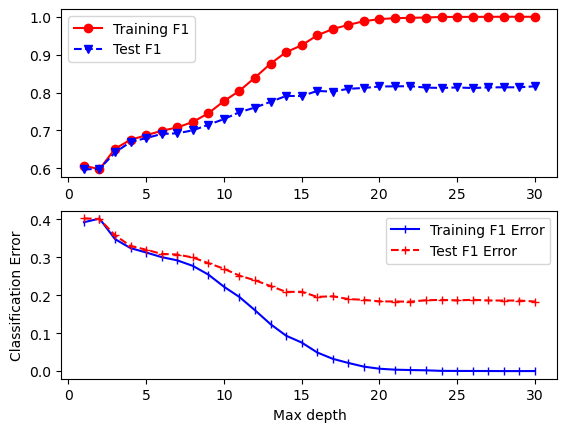

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(max_depths,RFtrain_f1,'ro-',max_depths,RFtest_f1,'bv--')
ax2.plot(max_depths,RFtrain_f1e,'b|-',max_depths,RFtest_f1e,'r+--')

ax1.legend(['Training F1','Test F1'])
ax2.legend(['Training F1 Error','Test F1 Error'])


plt.xlabel('Max depth')
plt.ylabel('Classification Error')
plt.show()

From the plot above we can see that we have some overfitting in the random forest model. The error in the training data is much lower in comparison to the testing error. We can see that there is a fork in the lines for training and testing error from max depth 10 onwards. Although the difference in error isn't too large, this isn't a good sign. This means the model has started to pick up the noise in the data as well as the underlying patterns, which is undesirable.

### c) Model selection (ROC or other charts)
From the metrics calculated above we can assume that the random forest is the better classification model from the two, however we need to plot the ROC to decide on the best model.

The ROC (receiver operating characteristic) curve is a visual approach to assessing the true positive rate (detect +) and the false positive rate (detect -). Ideally, we want the true positive rate to be much higher than the false positive rate. The true positive rate is plotted along the y-axis and the false positive rate is along the x-axis. On the plot, a good model leans more toward the upper left corner and further away from the x-axis.

Text(0.5, 0, 'False Positive Rate')

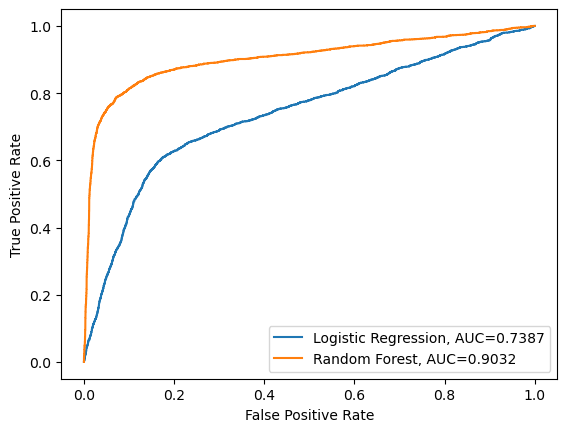

In [ ]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = LogisticRegression(solver='lbfgs', C=10, class_weight='balanced', max_iter=1000)
model.fit(Xtrain1, y_train)
y_pred = model.predict_proba(Xtest1)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit random forest model and plot ROC curve
model = RandomForestClassifier(n_estimators = 150, max_depth = 15, class_weight = 'balanced')
model.fit(Xtrain1, y_train)
y_pred = model.predict_proba(Xtest1)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#add legend
plt.legend()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

From the above we can see that the orange line representing the random forest model is closer to the left-hand corner of the plot. This means that the true positive rate is much higher than the false positive rate. The logistic regression ROC curve isn't terrible, it is still leaning towards the top left corner but not as strongly as the random forest ROC curve. This means that the true positive rate is still higher than the false positive rate but the difference isn’t as great as it is in the random forest model.

From this we can justify selecting the random forest model as the classification model to detect and refer fraudulent claims to the insurance company.

## 7. Final recommendation of best model (8 marks)

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency
From the analysis performed on the data based on the models produced the random forest model had the lowest generalisation error and performed better overall when predicting on testing data in comparison to the logistic regression model. However, due to the nature of the random forest classifier the cross validation and nested cross validation took a long time to run. There were 2 hyperparameters, one with 4 values and the other with 5 values, this means that there were 4 x 5 = 20 possible combinations of hyperparameters to be run and fit. In the nested cross validation, there were 4 folds in the inner cv and 8 in the outer, resulting in a complexity of 20 x 4 x 8 = 640. As a result, some of the code tool a while to run, the cross validation took almost 8 minutes to run which is not efficient.

We discovered that the random forest model suffered from overfitting by plotting max depth against the error for training and testing data. This means that I did not succeed in limiting the level of overfitting in the model and some noise was beginning to be captured along with the underlying patterns. This results in a poorly fitted model, which in turn results to higher error within the model when used for classification.

### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective
Overall, the model that was the best from the two that were fitted did not meet the insurance company’s requirement of a 5% balanced error rate. Hence the suggested classification model will incorrectly classify a claim as fraudulent and refer it. This, in turn, can lead to a drop in customer satisfaction since there will be delays in receiving payments if the claim is investigated further, resulting in loss of business. Further to this some parts of the code did not run quickly enough, this means that there may be a delay in producing the classification, which may mean that the fraudulent claim may already be paid out to the customer. This will lead to loss of profits for the company.

## 8. Conclusion (8 marks)

### a) What has been successfully accomplished and what has not been successful?
The preprocessing was completed successfully since I spent the most time on this. After I completed the preprocessing I realised I’d have to ass some pipelines since I split the data and then applied more preprocessing manually. This would be inefficient and infeasible when cross validation was applied. I decided to keep all the initial preprocessig steps I performed to show my thought process behind the cleaning and feature selection. Further to this I think I managed to produce two good classification models, along with their metrics and hyperparameter optimisation.  

I was not successful in preventing overfitting in my recommended model and the balanced error of the model was much higher than what was expected. Further to this, since I am unfamiliar with python, it took me longer to write code and debug my code. This resulted in less time for refinement and adding extra details to my work.

### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again?
If I was to do the project again, I would spend less time on the preprocessing step and focus more on the model and optimisation. Further to this I would explore more of the sklearn functions available instead of manually trying to implement certain techniques. This would save me a lot of time, which I could put towards improving my work.  I would also try to reduce the complexity of my models by applying some regularisation. This may have reduced the extent of overfitting and provide lower balanced accuracy scores.  

### c) Provide a wish list of future work that you would like to do

I would like to fit more classification models to see if there is a better model in comparison to the 2 models I chose. I would also like to apply regularisation and early stopping in order to improve the 2 models I did produce to see if I could get their balanced error rates lower. Further to this I would have liked to have tried different feature selection methods and fit models to various subsets of the features to see if the models could be improved.